# Loan Application status

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

dataset contains 614 rows and 13 columns or varfiables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


1] LoanID ihave to be eliminated fro dataset.

2] ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term ,Credit_History,Property_Area are numeric data type variables.

3]  remining featuress are object datatype.

4] Missing data observed in some feature which can be analyse further.

* Eliminating Loan_ID 

In [5]:
df=df.drop('Loan_ID',axis=1)
df.shape

(614, 12)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1] Credit History can be  categorical in nature .I has only two values 0 and 1.

2] more than 25% data in Coapplicant income is 0.

3] Loan_Amount_term has minimum 12 . 

* Analysis for duplicate records.

In [7]:
df.duplicated().all()

False

* No duplicates have found in dataset.

* Analysis of missing values

In [8]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.isna().sum().sum()

149

* There are total  149 records have missing data., which have to be imputed or deleted.

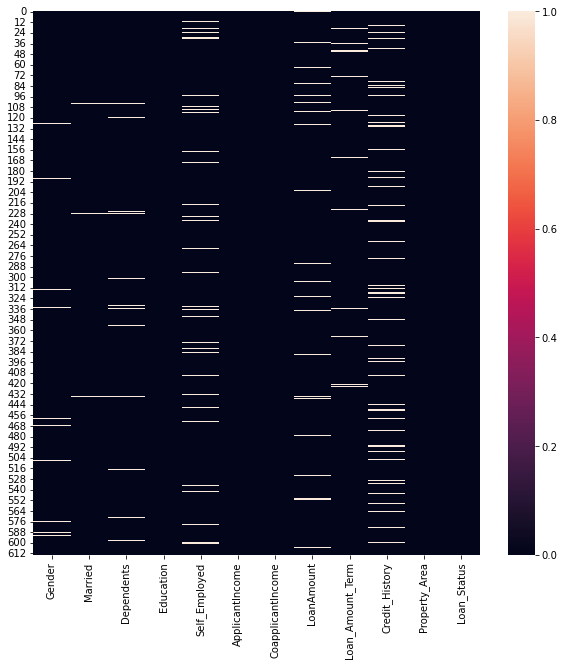

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

1] Gender has 13  missing values 

2] Married has 03 missing values.

3]dependents has 15 missing values.

4] Self Employed has 32 missing values 

4] LoanAmount has 22 missing values 

6] Loanaomunt Term has 14 missing values.

7] Credit_History has 50 missing records

* Analyse number of unique values in varaibles

In [11]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

Gender :

3
______________________________

Married :

3
______________________________

Dependents :

5
______________________________

Education :

2
______________________________

Self_Employed :

3
______________________________

ApplicantIncome :

505
______________________________

CoapplicantIncome :

287
______________________________

LoanAmount :

204
______________________________

Loan_Amount_Term :

11
______________________________

Credit_History :

3
______________________________

Property_Area :

3
______________________________

Loan_Status :

2
______________________________



* 1] ApplicantIncome, CoapplicantIncome, LoanAmount  are continuous  in nature. 

* Imputation for missing data.

* As Loan Applications are depends on person.It will vary from person to person. It can not be predicted or calculated that 
 what will the missing value for person.
 
 But it can be imputed with mode mean values of feature itself for sake of cosideration.
 

1] The missing values in Married Feature can be imputed with mode of Married feature.

In [12]:
df["Married"].fillna(value=df["Married"].mode()[0],inplace=True)


2] The missing values in Gender Feature can be imputed with mode of Gender feature.

In [13]:
df["Gender"].fillna(value=df["Gender"].mode()[0],inplace=True)

3] The missing values in Dependents Feature can be imputed with mode of Dependents feature.

In [14]:
df["Dependents"].fillna(value=df["Dependents"].mode()[0],inplace=True)

4] The missing values in Self_Employed Feature can be imputed with mode of Self_Employed feature.

In [15]:
df["Self_Employed"].fillna(value=df["Self_Employed"].mode()[0],inplace=True)

5] The missing values in Self_Employed Feature can be imputed with mode of Self_Employed feature.

In [16]:
df["Self_Employed"].fillna(value=df["Self_Employed"].mode()[0],inplace=True)

6] The missing values in Credit_History Feature can be imputed with mode of Credit_History feature.

In [17]:
df["Credit_History"].fillna(value=df["Credit_History"].mode()[0],inplace=True)

7] The missing values in Loan_Amount_Term Feature can be imputed with mode of Loan_Amount_Term feature.

In [18]:
df["Loan_Amount_Term"].fillna(value=df["Loan_Amount_Term"].mode()[0],inplace=True)

8] As LoanAmount feature is continuous in nature  The missing values in LoanAmount Feature can be imputed with mean of LoanAmount feature.

In [19]:
df["LoanAmount"].fillna(value=df["LoanAmount"].mean(),inplace=True)

* Analysis of missing data after imputation

In [20]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.isna().sum().sum()

0

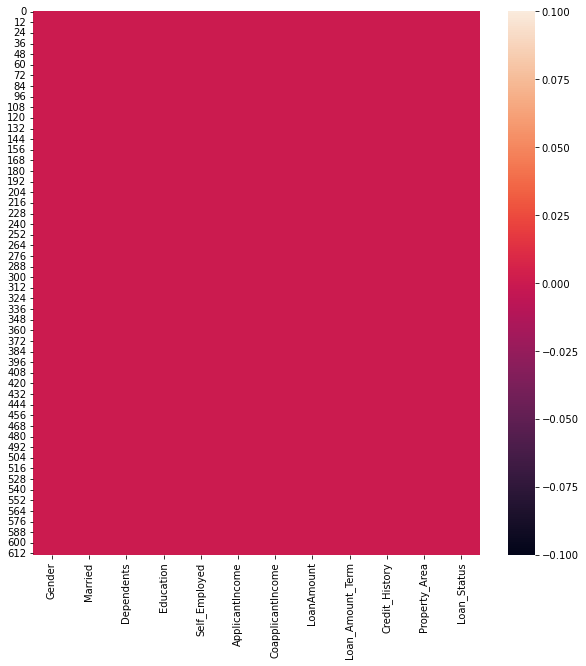

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

* 

In [23]:
for i in df.columns:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

Gender 

['Male' 'Female']
----------------------------------

Male      502
Female    112
Name: Gender, dtype: int64 

----------------------------------

Married 

['No' 'Yes']
----------------------------------

Yes    401
No     213
Name: Married, dtype: int64 

----------------------------------

Dependents 

['0' '1' '2' '3+']
----------------------------------

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

----------------------------------

Education 

['Graduate' 'Not Graduate']
----------------------------------

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

----------------------------------

Self_Employed 

['No' 'Yes']
----------------------------------

No     532
Yes     82
Name: Self_Employed, dtype: int64 

----------------------------------

ApplicantIncome 

[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799 

* seprating feature in Nmeric datatype and Object Datatype

In [24]:
num=[]
obj=[]
for i in df.columns:
    if df[i].dtype==np.object:
        obj.append(i)
    else:
        num.append(i)
print(len(num))
print(num)
print("--------------------------")
print(len(obj))
print(obj)

5
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
--------------------------
7
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


* Analysing Distribution of numeric variables in dataset.

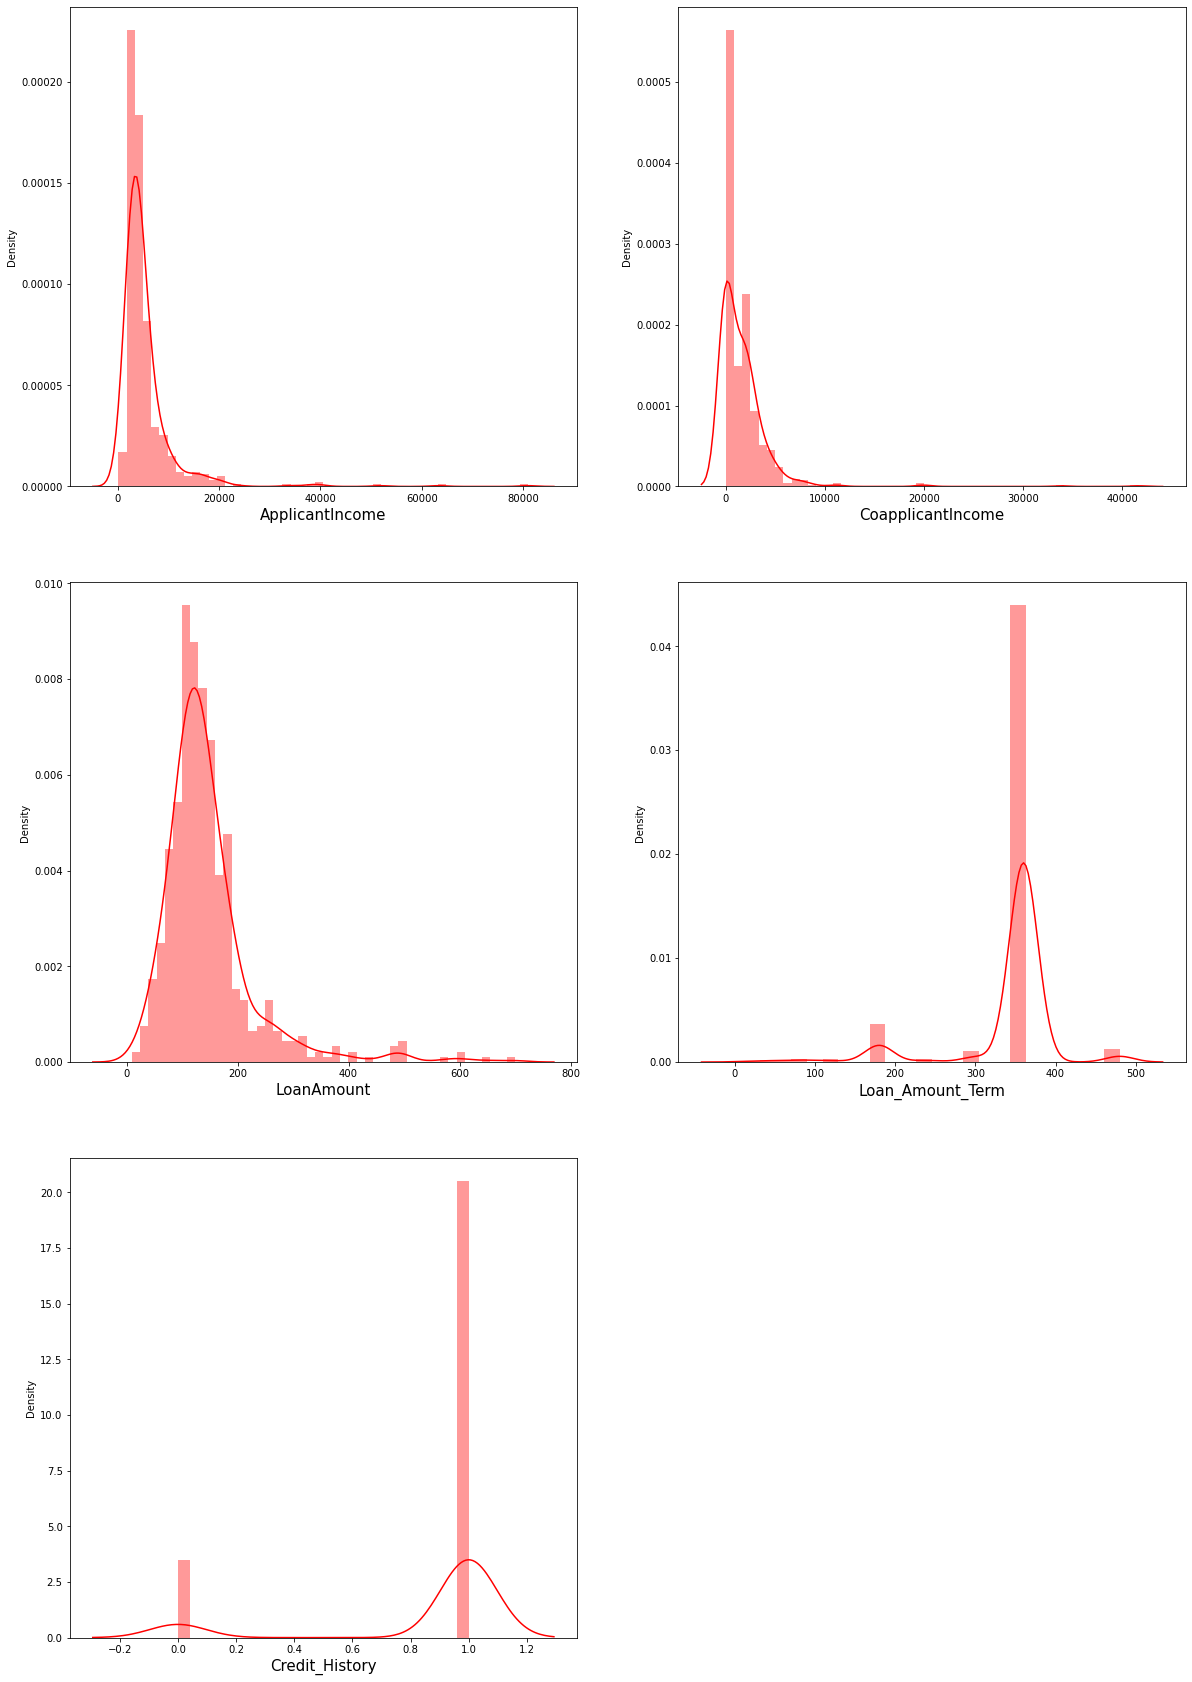

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in num:
    if graph<=len(num):
        ax=plt.subplot(3,2,graph)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Loan Amount Term and Credit History are categorical in nature 

2] ApplicantsIncome and Coapplicantsincome are highly skewed continuous feature 

3] LoanAmount is mderately skewed continuous feature .

* Count of categories in variables.

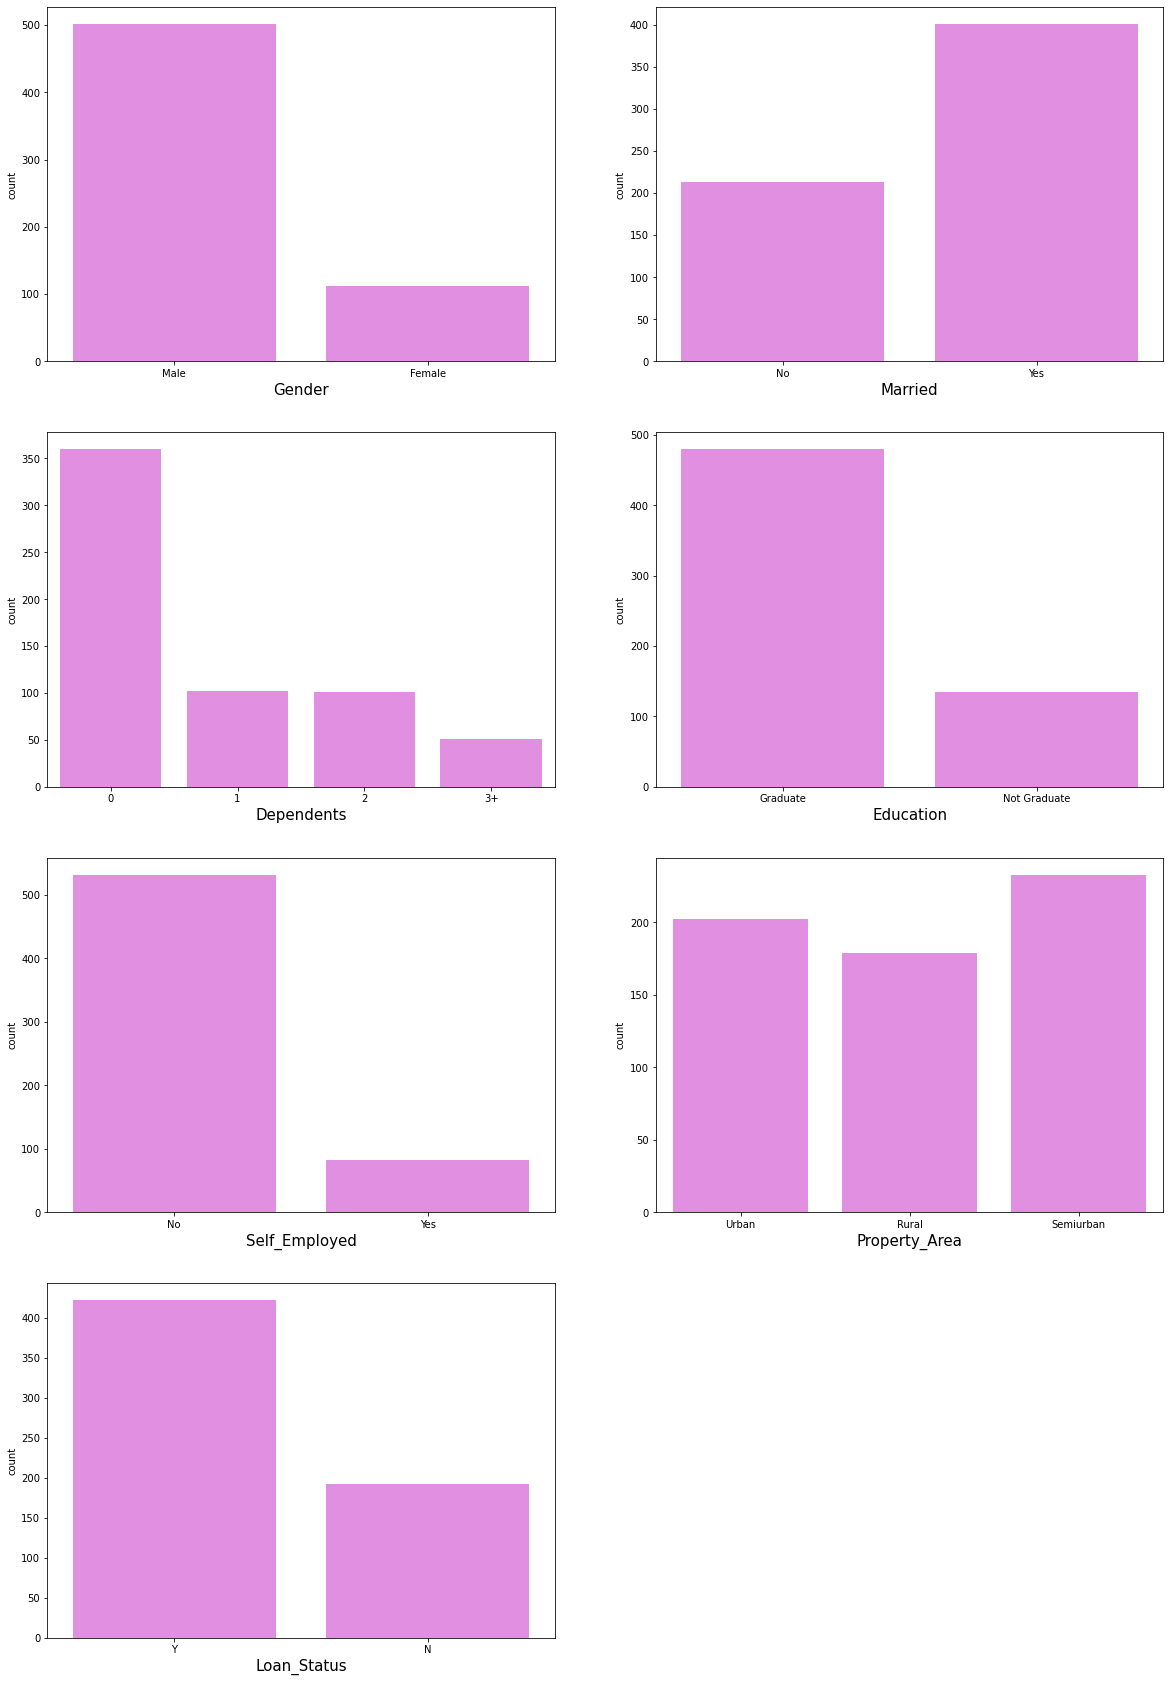

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in obj:
    if graph<=len(obj):
        ax=plt.subplot(4,2,graph)
        sns.countplot(df[column],color='violet')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

* Analysis of percentage or contribution  of categories in variables.

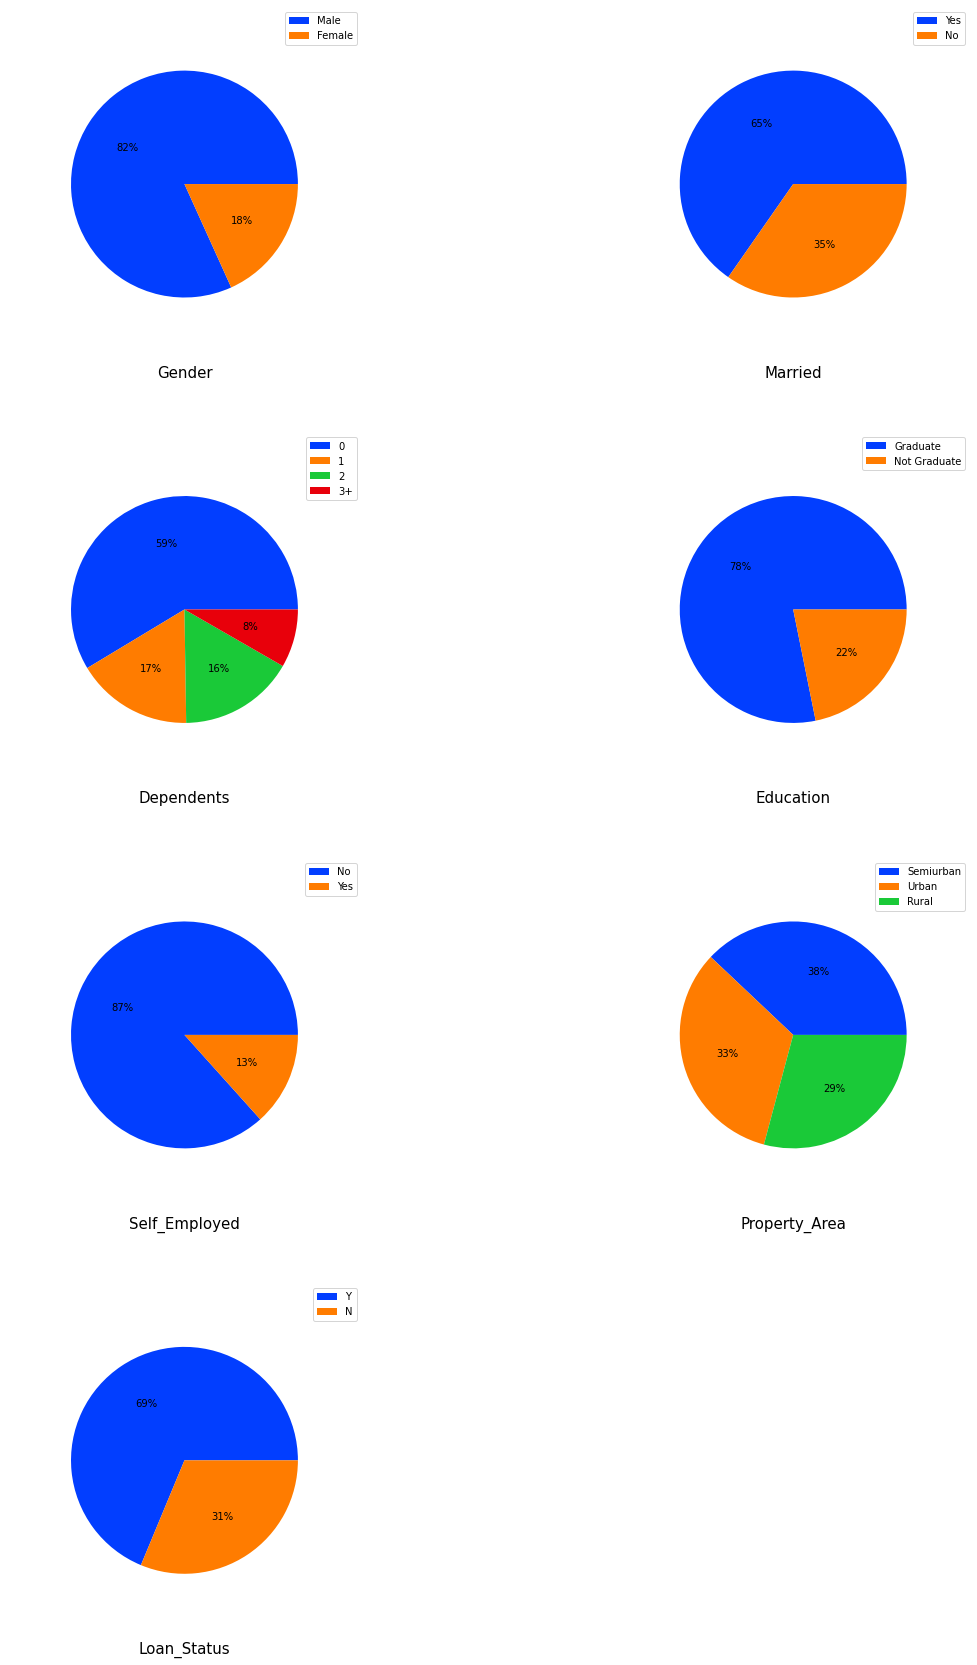

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in obj:
    if graph<=7:
        ax=plt.subplot(4,2,graph)
        plt.pie(x=df[column].value_counts(),autopct='%0.00f%%',radius=0.8)
        plt.legend(df[column].value_counts().index,loc='best')
        plt.xlabel(column,fontsize=15)
      
        
    graph+=1
plt.show()
plt.tight_layout()

1] Applicants have higher ratio of married person.

2] Applicants have higher percentage of Male.

3] 60 percenta applicants have no depedents as observe in above .

4] 78% of applicants are Graduate .

5] upto 87% applicants are not self employed .

6] All applicants are from different region .eqaual proportion of from semi urban, urban and Urban area

7] upto 69% application have accepted while remainng rejected having status No. 

* Analysis of feature s with GroupBY method

* Lets analyse the proportion application accepted and rejected in Male and Female.

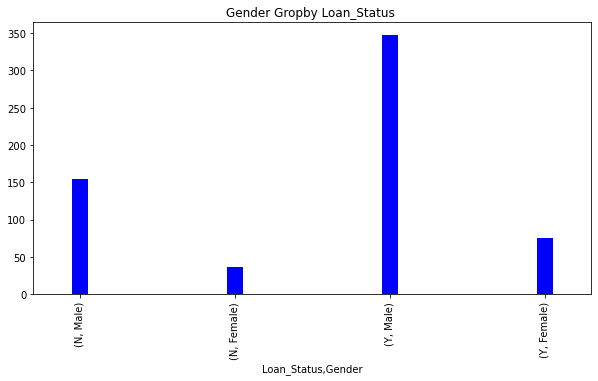

In [28]:
plt.figure(figsize=(10,5))
df.groupby('Loan_Status')['Gender'].value_counts().plot.bar(color='b',width=0.1)
plt.title('Gender Gropby Loan_Status ')
plt.show()

1] As number of Male applicants is high so there is high count of male  is observed in accepted  as well as rejected.

* Analyse proportion of Married applicants in accepted and rejected categories

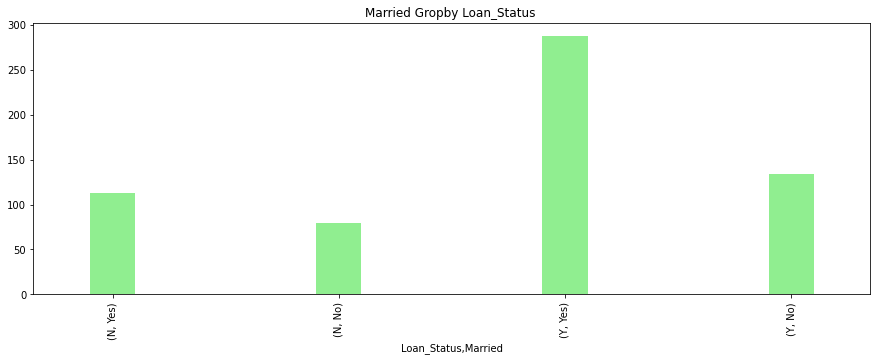

In [29]:
plt.figure(figsize=(15,5))
df.groupby('Loan_Status')['Married'].value_counts().plot.bar(color='lightgreen',width=0.2)
plt.title('Married Gropby Loan_Status ')
plt.show()

1]  Married people have chance of acceptance of loan application as can be observed.

* Analyse Depedents variation with  acceptance and rejection of application. 

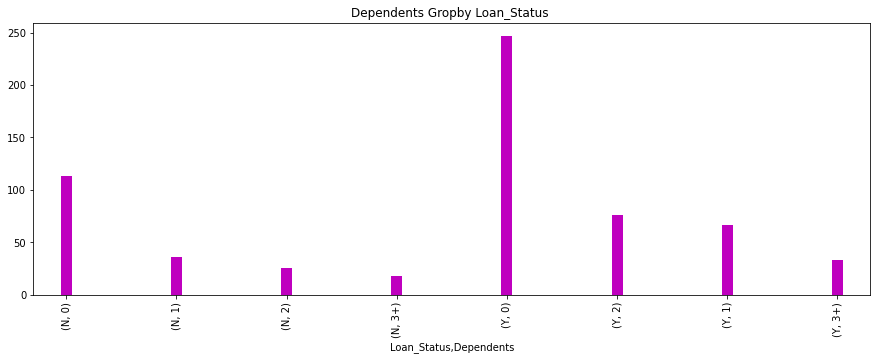

In [30]:
plt.figure(figsize=(15,5))
df.groupby('Loan_Status')['Dependents'].value_counts().plot.bar(color='m',width=0.1)
plt.title('Dependents Gropby Loan_Status ')
plt.show()

1]Loan Application of  applicants having no depedents have high probabilty to be accepted.

* Dependency of Graduate education of applicants in Loan application acceptance.

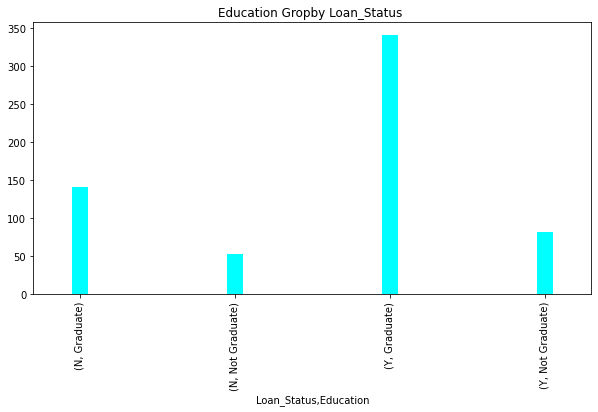

In [31]:
plt.figure(figsize=(10,5))
df.groupby('Loan_Status')['Education'].value_counts().plot.bar(color='cyan',width=0.1)
plt.title('Education Gropby Loan_Status ')
plt.show()

* Dependency of self employed on application acceptance and rejection.

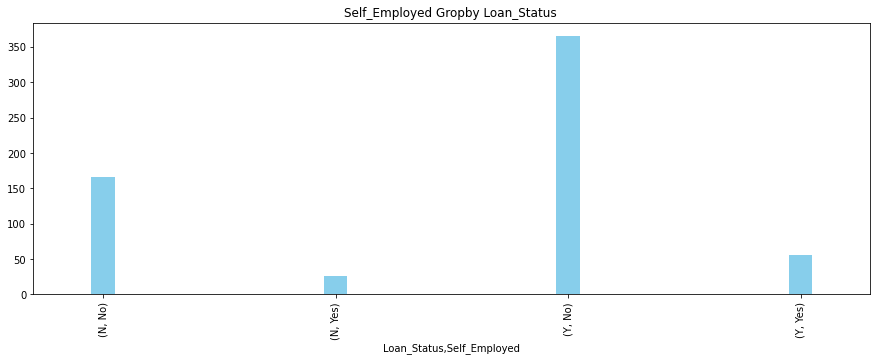

In [32]:
plt.figure(figsize=(15,5))
df.groupby('Loan_Status')['Self_Employed'].value_counts().plot.bar(color='skyblue',width=0.1)
plt.title('Self_Employed Gropby Loan_Status ')
plt.show()

* Number of people having acceptance of application based on property area.

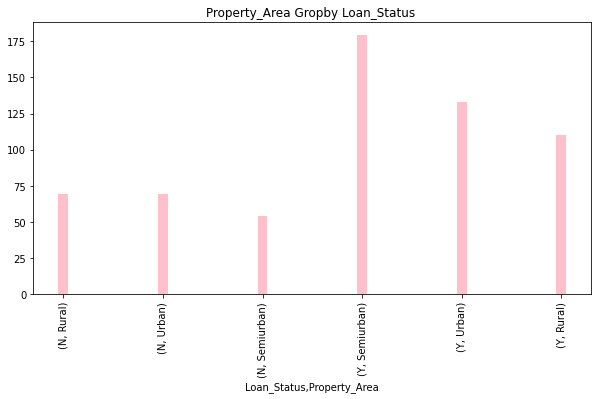

In [33]:
plt.figure(figsize=(10,5))
df.groupby('Loan_Status')['Property_Area'].value_counts().plot.bar(color='pink',width=0.1)
plt.title('Property_Area Gropby Loan_Status ')
plt.show()

* How many people opted for how much term their count in acceaptence and rejection.

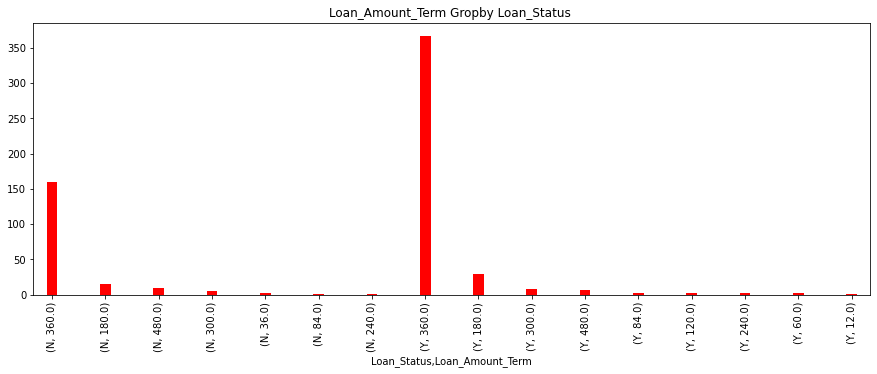

In [34]:
plt.figure(figsize=(15,5))
df.groupby('Loan_Status')['Loan_Amount_Term'].value_counts().plot.bar(color='r',width=0.2)
plt.title('Loan_Amount_Term Gropby Loan_Status ')
plt.show()

1] The loanapplications with LoanAmountTerm 360 have high probability of acceptance of loan.

* Credit hstory counts grouping with Loan Status.

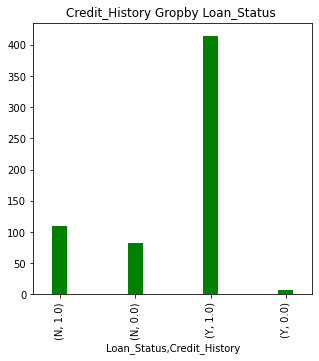

In [35]:
plt.figure(figsize=(5,5))
df.groupby('Loan_Status')['Credit_History'].value_counts().plot.bar(color='g',width=0.2)
plt.title('Credit_History Gropby Loan_Status ')
plt.show()

* Continuous feature.

1]applicants Income Gruop by Loan Status.

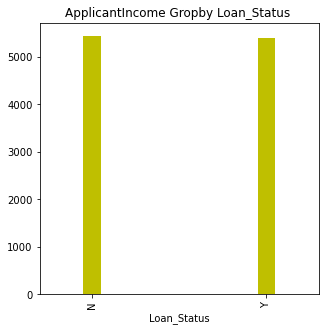

In [36]:
plt.figure(figsize=(5,5))
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color='y',width=0.1)
plt.title('ApplicantIncome Gropby Loan_Status ')
plt.show()

* Applicants with accpeted loan applicationa have higher proportion, Althogh the mean of ApplicantsIncome  groupp by Loan Status is same as applicantsIncome with rejected applications.

* CoapplicantsIncome GroupBy LoanStatus.

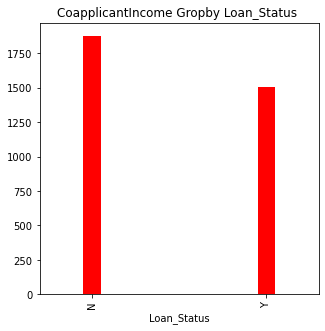

In [37]:
plt.figure(figsize=(5,5))
df.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar(color='red',width=0.1)
plt.title('CoapplicantIncome Gropby Loan_Status ')
plt.show()

* Loan Status is not depends on coapplicants income as CoapplicnatsIncome mean groupby Loan Status is lower for accepted applications. 

* LoanAmount Groupby LoanStatus

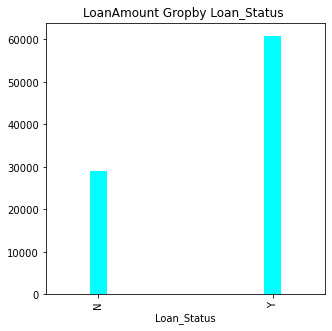

In [38]:
plt.figure(figsize=(5,5))
df.groupby('Loan_Status')['LoanAmount'].sum().plot.bar(color='cyan',width=0.1)
plt.title('LoanAmount Gropby Loan_Status ')
plt.show()

1] The sum of LoanAmount Groupby LoanStatus is high in case of accepted applications.

* Scatterplot of CoapplicantsIncome with ApplicantsIncome .

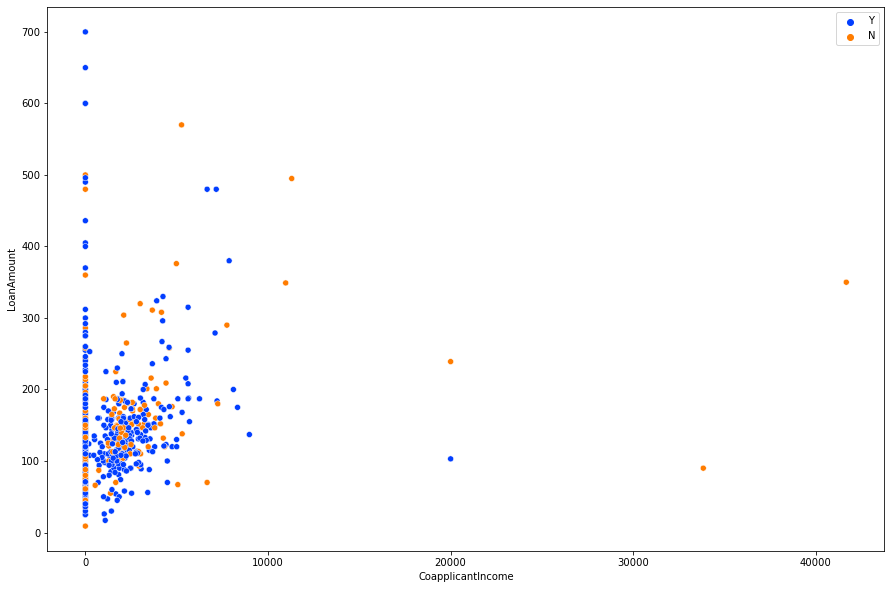

In [39]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['CoapplicantIncome'], y=df['LoanAmount'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()


1] Application receive have coaplicantsIncome is within the rnage of 10k and Loan Amount of 500.

* scatter graph of Applicants INcome with LOan Amount 

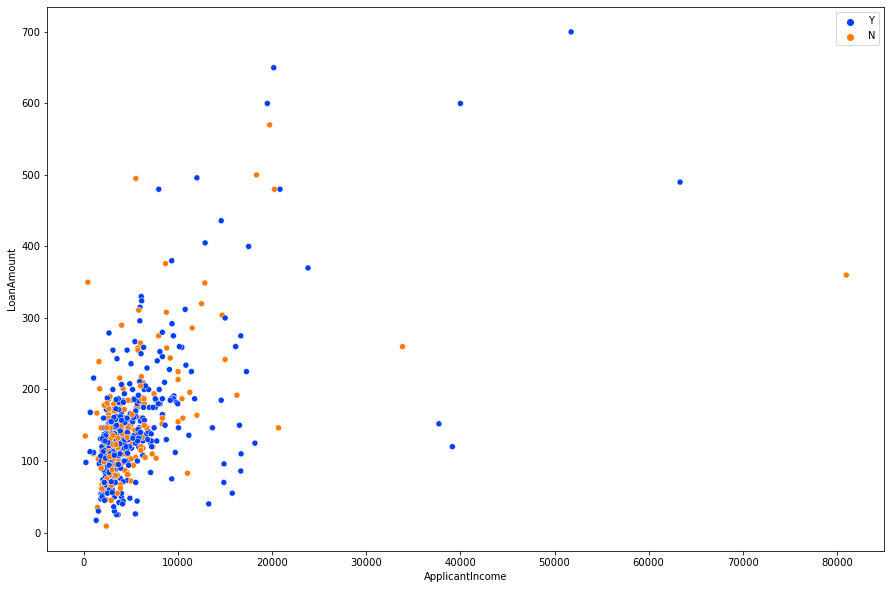

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()


1] There is no relation can be found in ApplicantsIncome and Loan Amount 

2] As Applicants who had applied for Loan heve their Incme within range of 20000 and LOan Amount  for which Opted is under 500

* scattergraph for LoanAmountTerm and Dependents

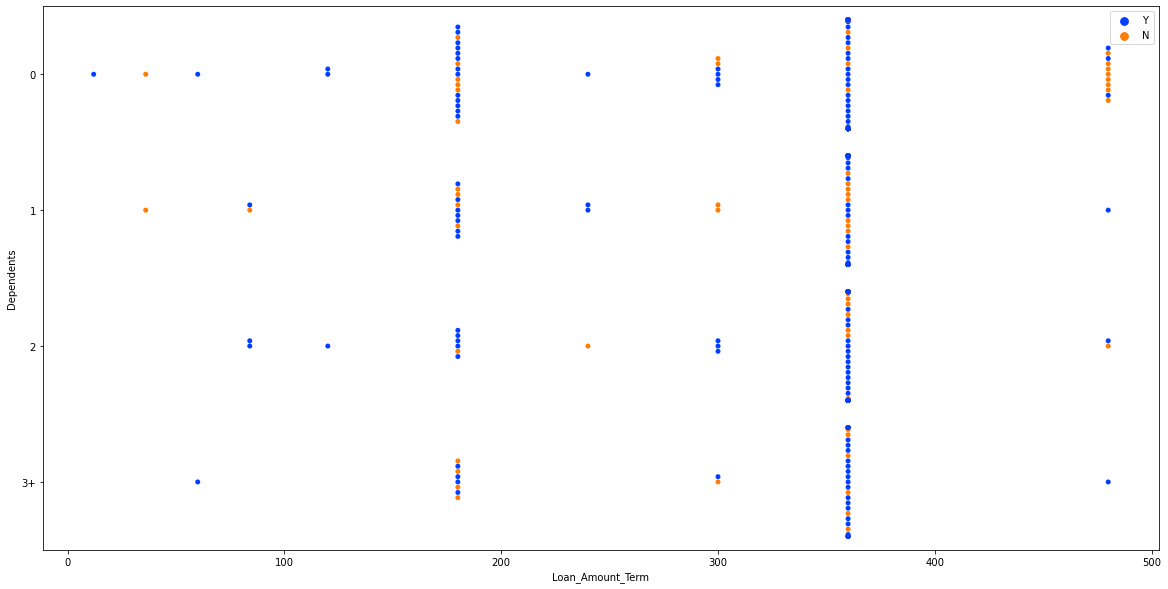

In [41]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['Loan_Amount_Term'], y=df['Dependents'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()


* Significant results canot be interpreted 

* Gender Vs Dependents

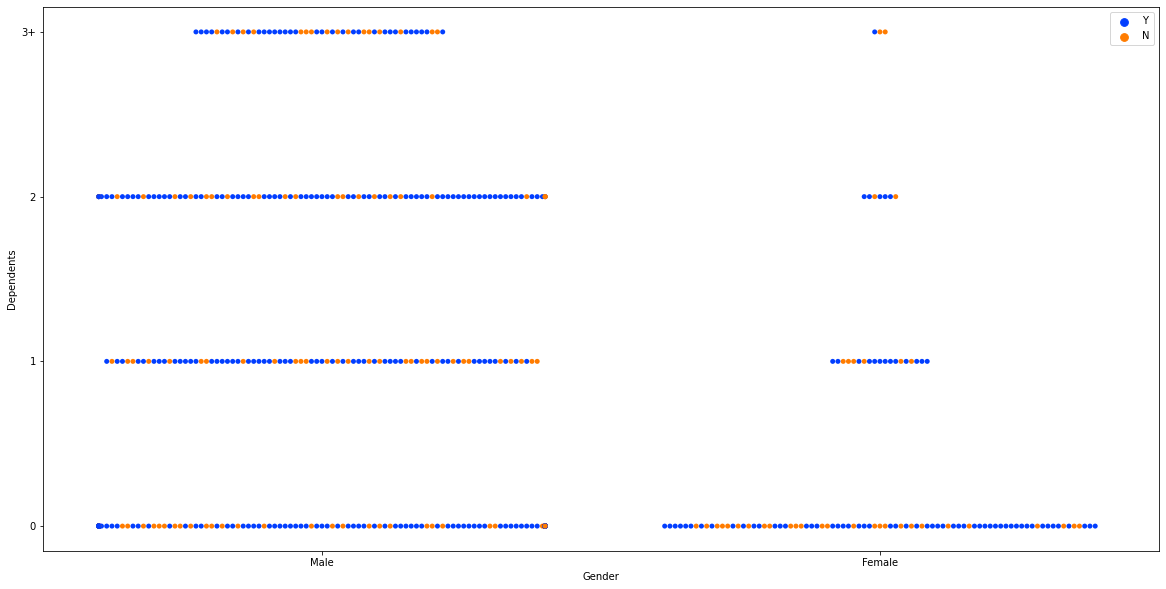

In [42]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['Gender'], y=df['Dependents'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()


* Applicants with 1 or more dependents are male mostly .as dependents increases female applicants decreases.

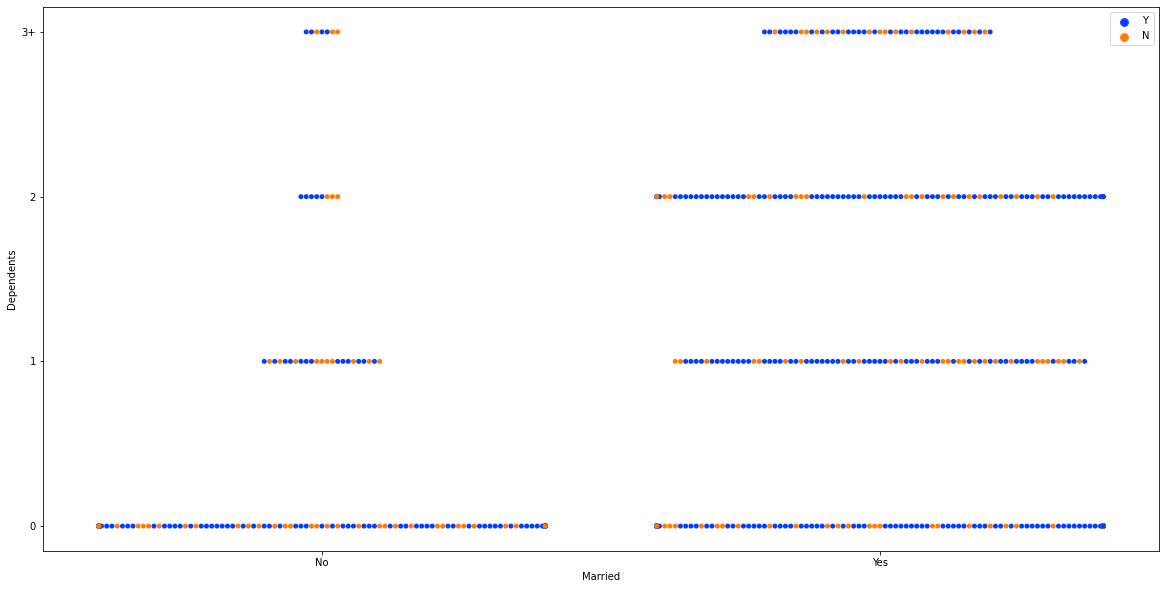

In [43]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['Married'], y=df['Dependents'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()

* Unmarried applicants have less dependats as mostly application with unmarries people or Not Married category have 0 dependants.

* Married appicnts have dependents from 0 to 3+.

* Education Vs Credit History 

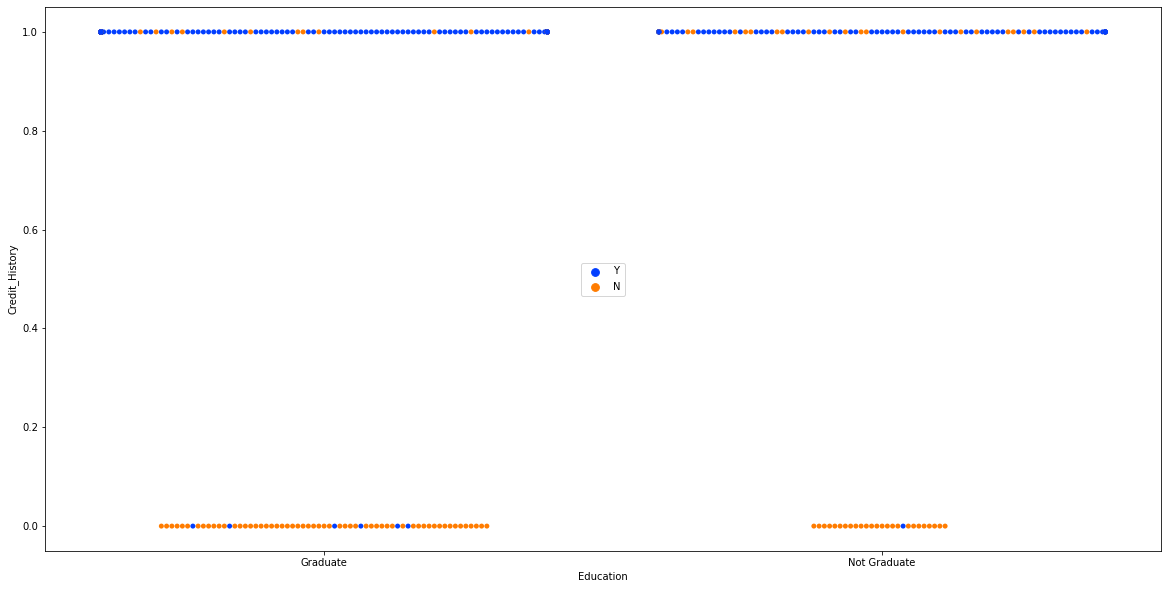

In [44]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['Education'], y=df['Credit_History'],data=df,hue=df["Loan_Status"])
plt.legend(loc='center')
plt.show()

* Applications with 0 credit History has been rejected , There is high correlation between LoanStatus and Credit History.

* LoanAmountTerm and LoanAmount 

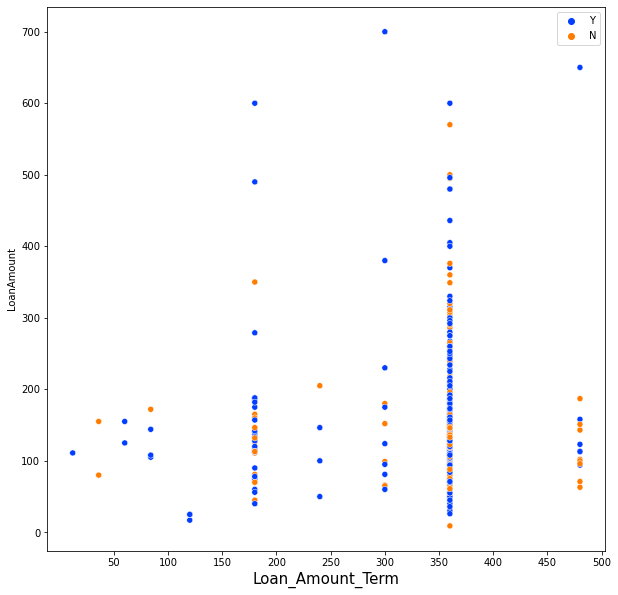

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Loan_Amount_Term'], y=df['LoanAmount'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.xlabel('Loan_Amount_Term',fontsize=15)
plt.xticks(range(50,510,50))
plt.show()


* No significant observation can be made.

* Education Vs LoanAmount

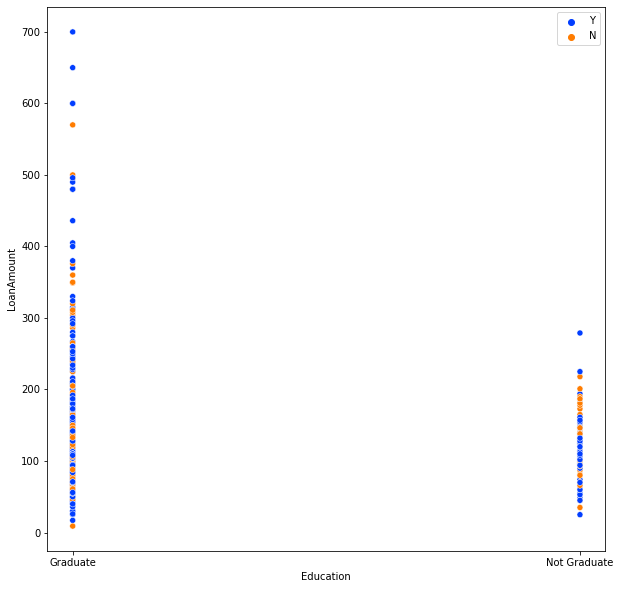

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Education'], y=df['LoanAmount'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()


* GRaduate applicants have applied for higher LoanAmount.

* Self emloyed VS LoanAmount

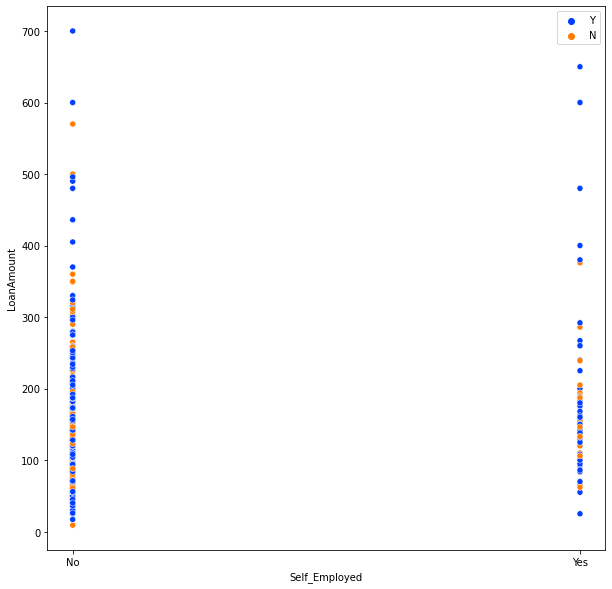

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Self_Employed'], y=df['LoanAmount'],data=df,hue=df["Loan_Status"])
plt.legend(loc='best')
plt.show()


* No significant Observation can be made

In [48]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

* As Maximum categories 11 are in Loan_Amount_Term features so it can be used for dividing dataset into continuous and categorial features.
 
 1] If more than 12 categories in variable it will be continuous in this dataset
    
 2] Else less than 12 categories in variable then it is categorical variable.   

In [49]:
cont=[]
cat=[]
for i in df.columns:
    if len(df[i].unique())>12:
        cont.append(i)
        
    else:
        cat.append(i)
        
print(len(cont))
print(cont)
print('-'*30)
print(len(cat))
print(cat)

3
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
------------------------------
9
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


* Violinplot

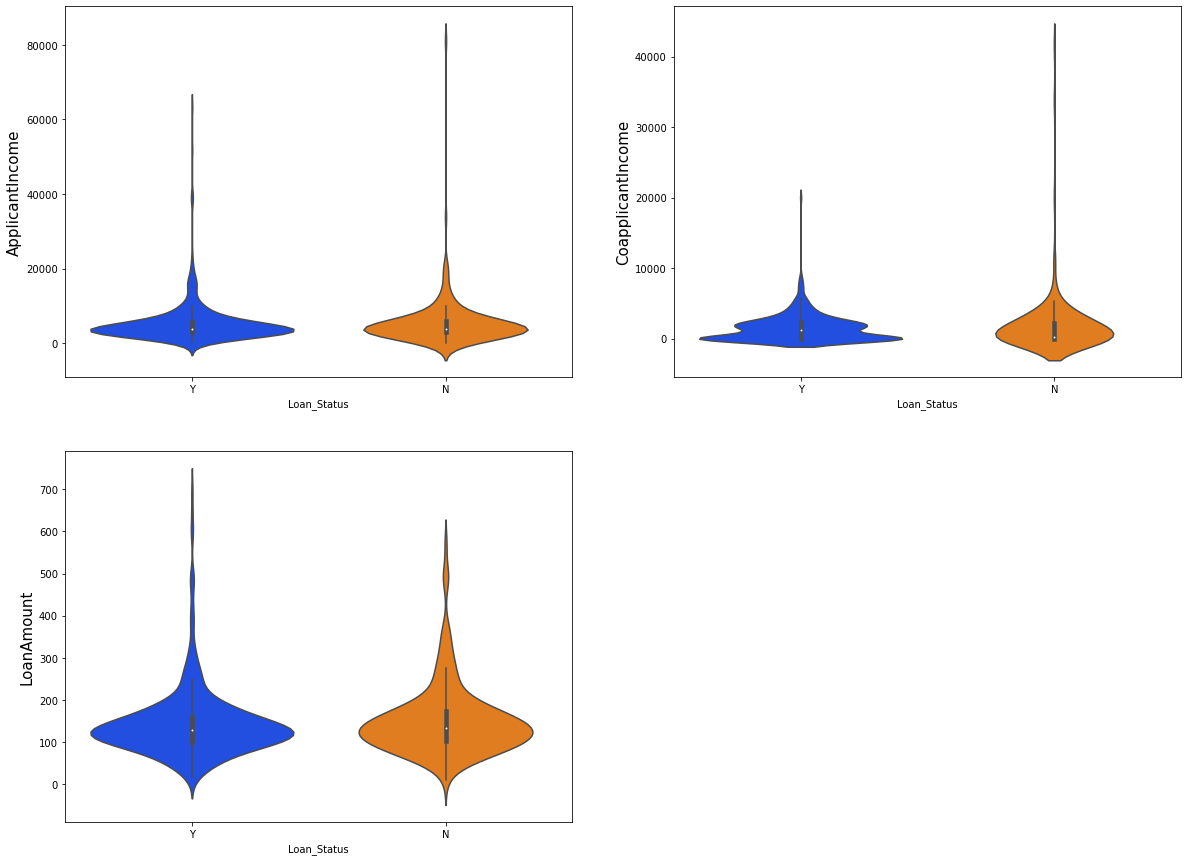

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(20,15))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df["Loan_Status"])
        plt.ylabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] for No LoanStatus ApplicantsIncome have less probability arround median than that of Yes LOanStatus.

2] For Yes LoanStatus, CoapplicantsIncome has higher porbability for less than and eqaul to median than for Income higher than median

3] LoanAmount has follows same distribution for NO and Yes LoanStatus.

* Viloin plot with Gender split.

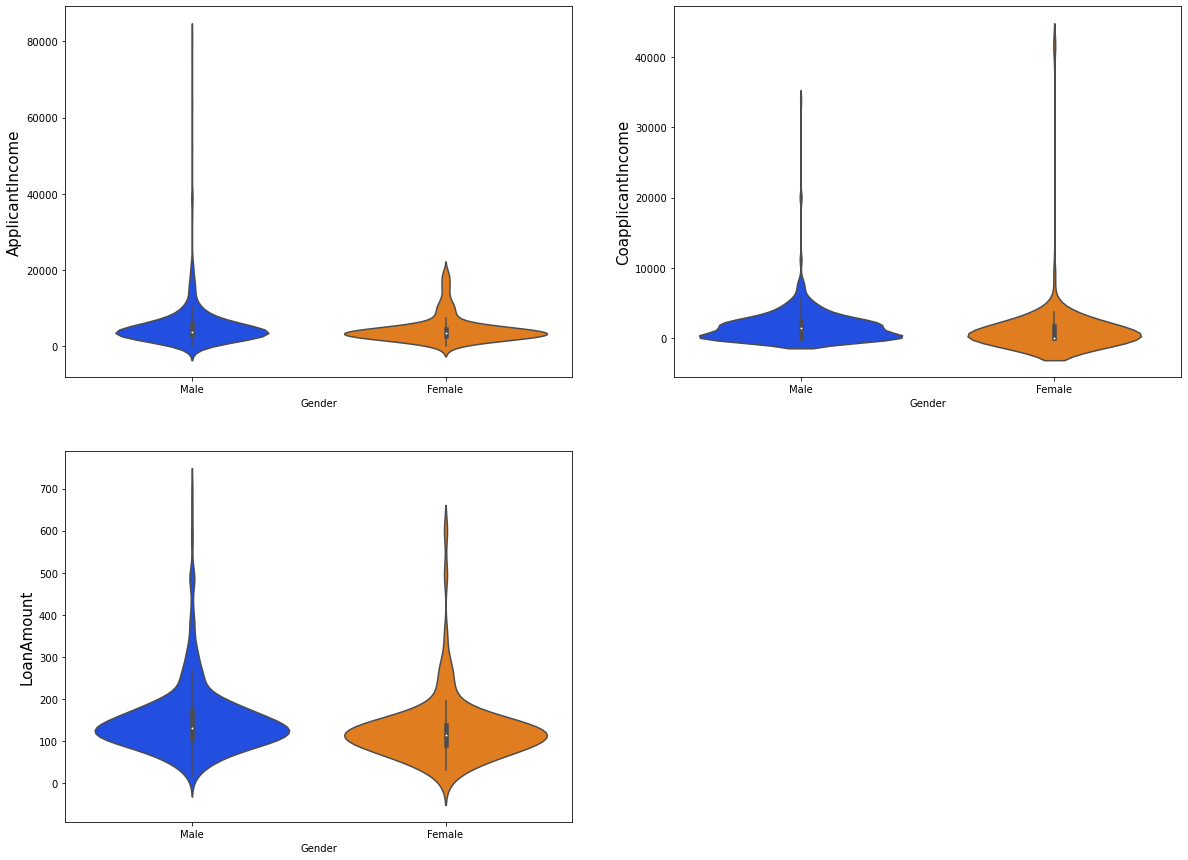

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(20,15))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df["Gender"])
        plt.ylabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Male applicantsIncome is right skewed while feamle applicantsIncome is somewhat normal in nature. Female applicantsIncome have less outliers than male applicantsIncome .

2] other graph have no significants observation . 

* continuous feature with Label LOanStatus

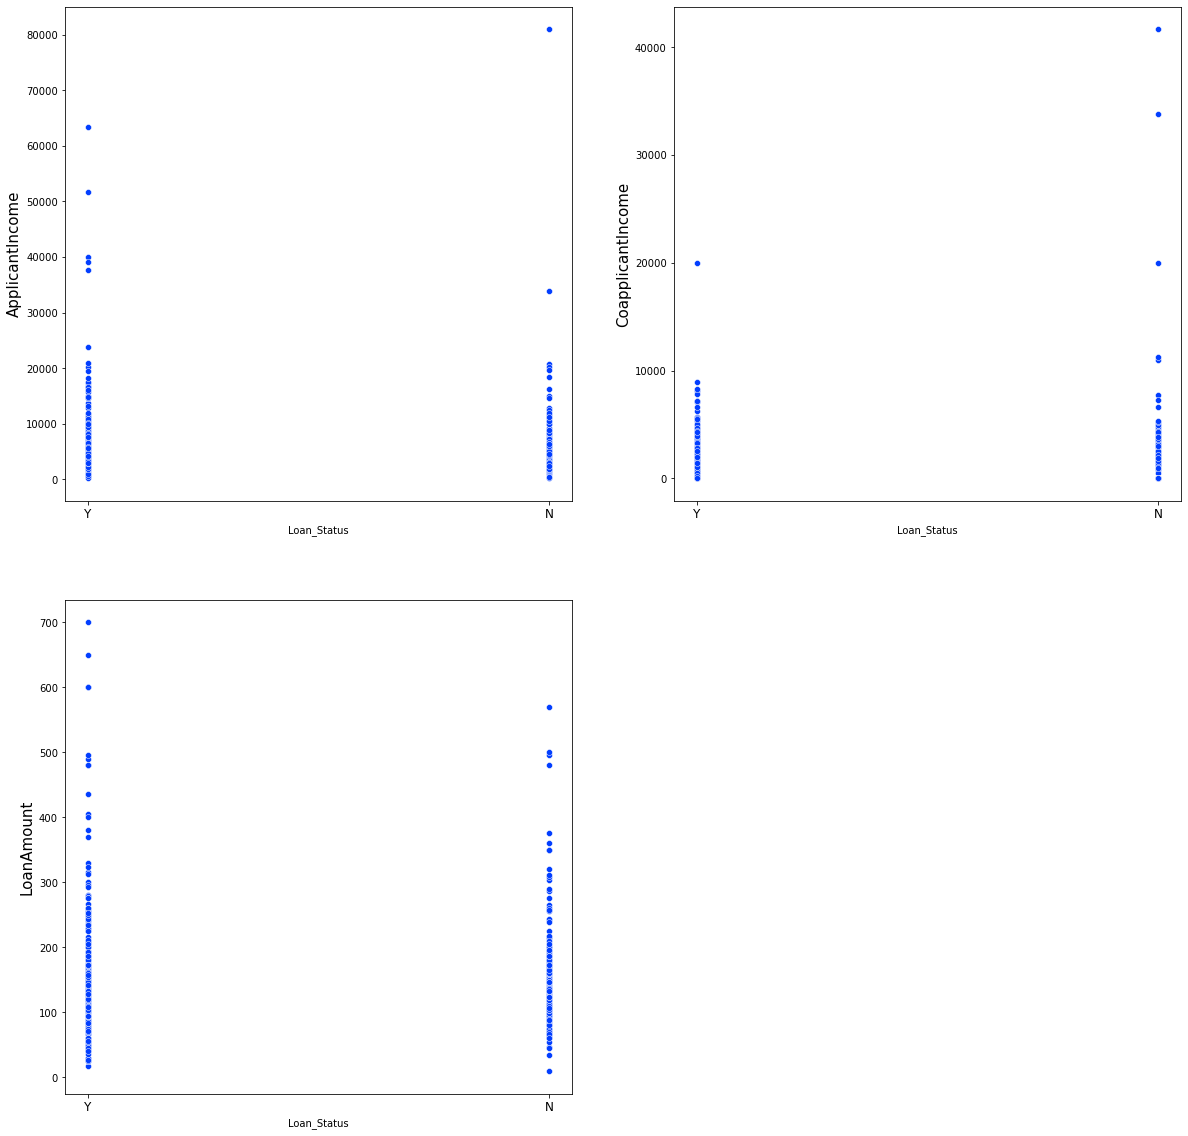

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.scatterplot(y=df[column],x=df['Loan_Status'])
        plt.ylabel(column,fontsize=15)
        plt.xticks(fontsize=12)
        
    graph+=1
plt.show()
plt.tight_layout()

* Categorical feature with label LoanStatus

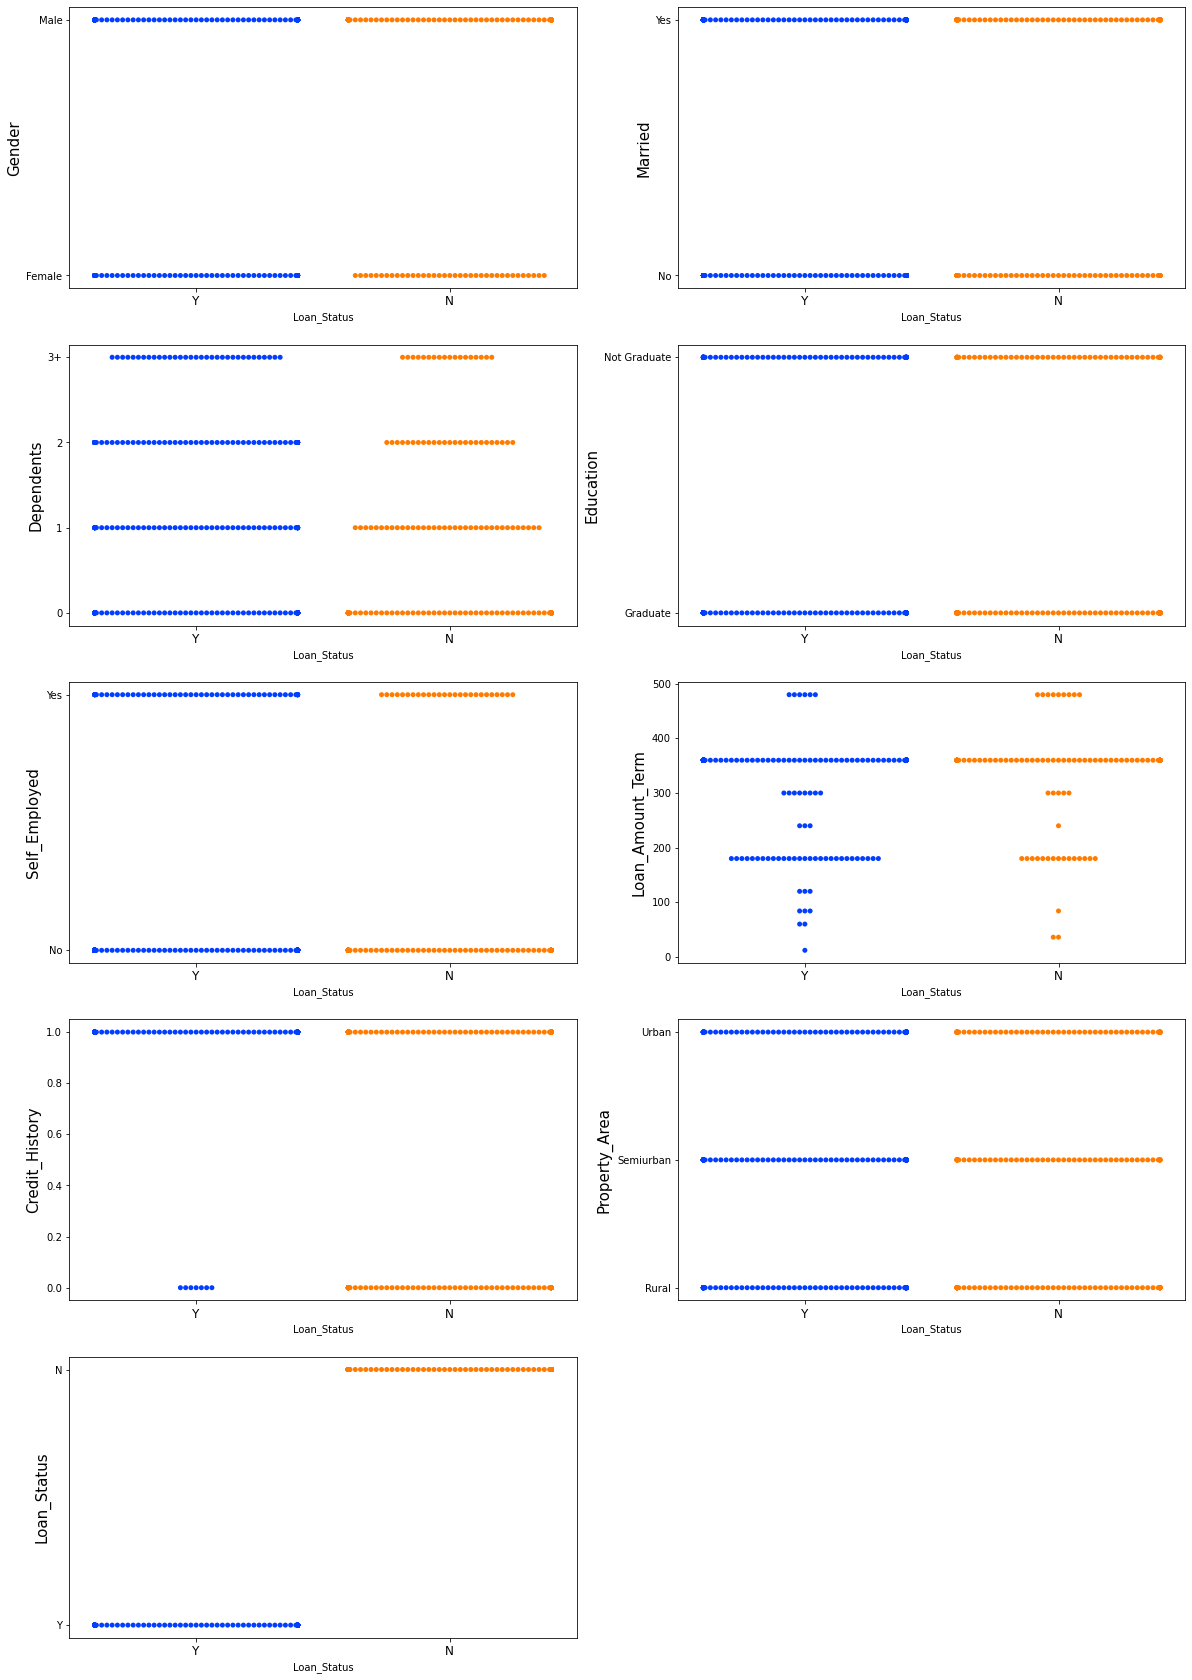

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cat:
    if graph<=9:
        ax=plt.subplot(5,2,graph)
        sns.swarmplot(y=df[column],x=df['Loan_Status'])
        plt.ylabel(column,fontsize=15)
        plt.xticks(fontsize=12)
        
    graph+=1
plt.show()
plt.tight_layout()

* Continuous feature analysis.

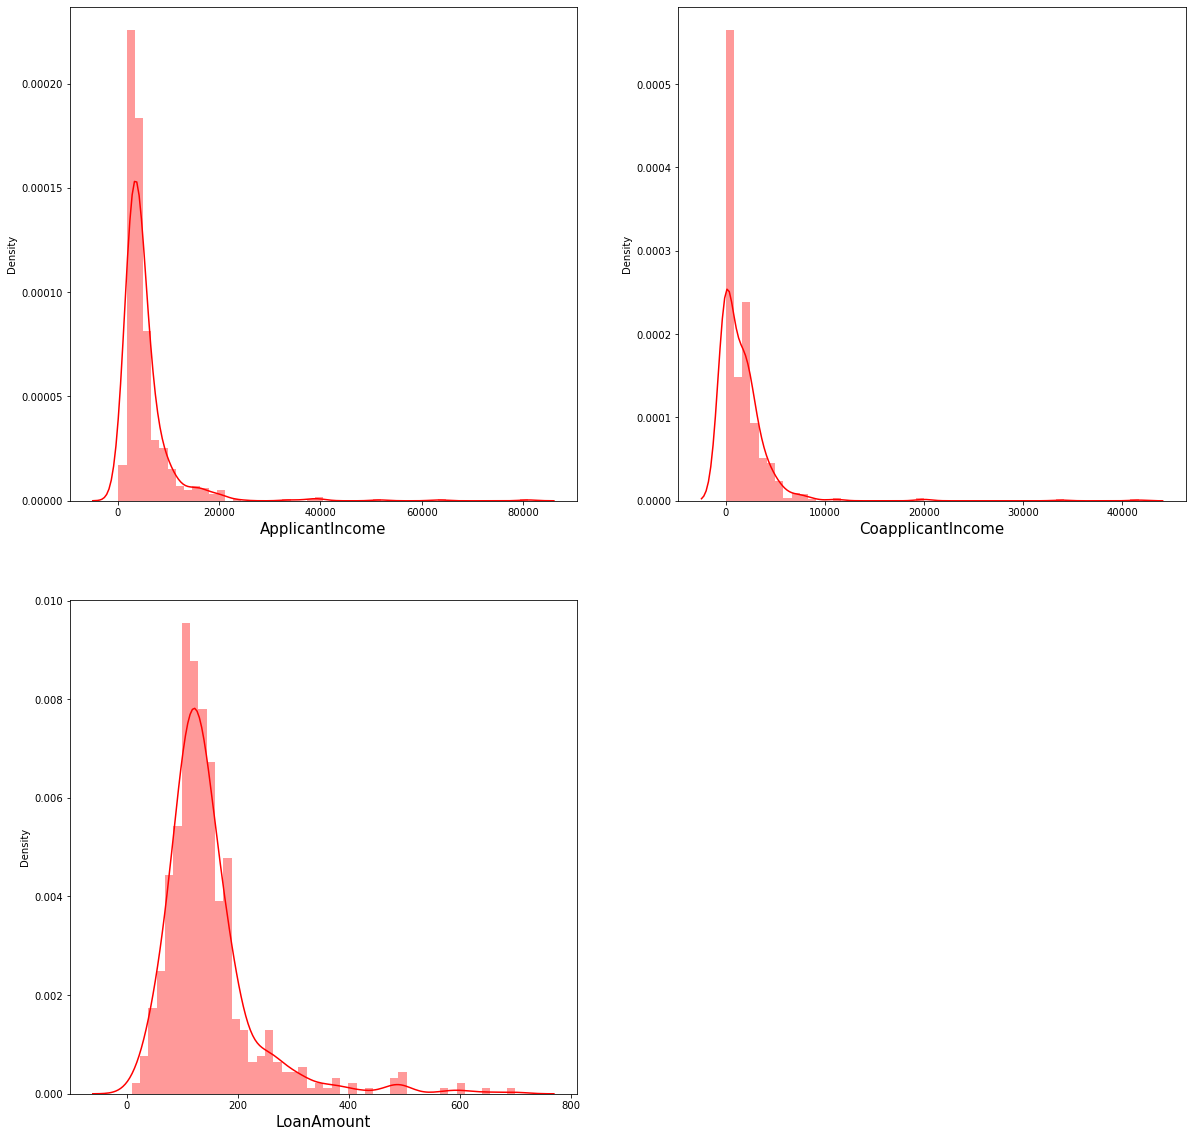

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(2,2,graph)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] All 03 fetures are right skewed as observed in graph, There are lots of zero in coapplicants Income.

* Outlier Detection with Boxplot

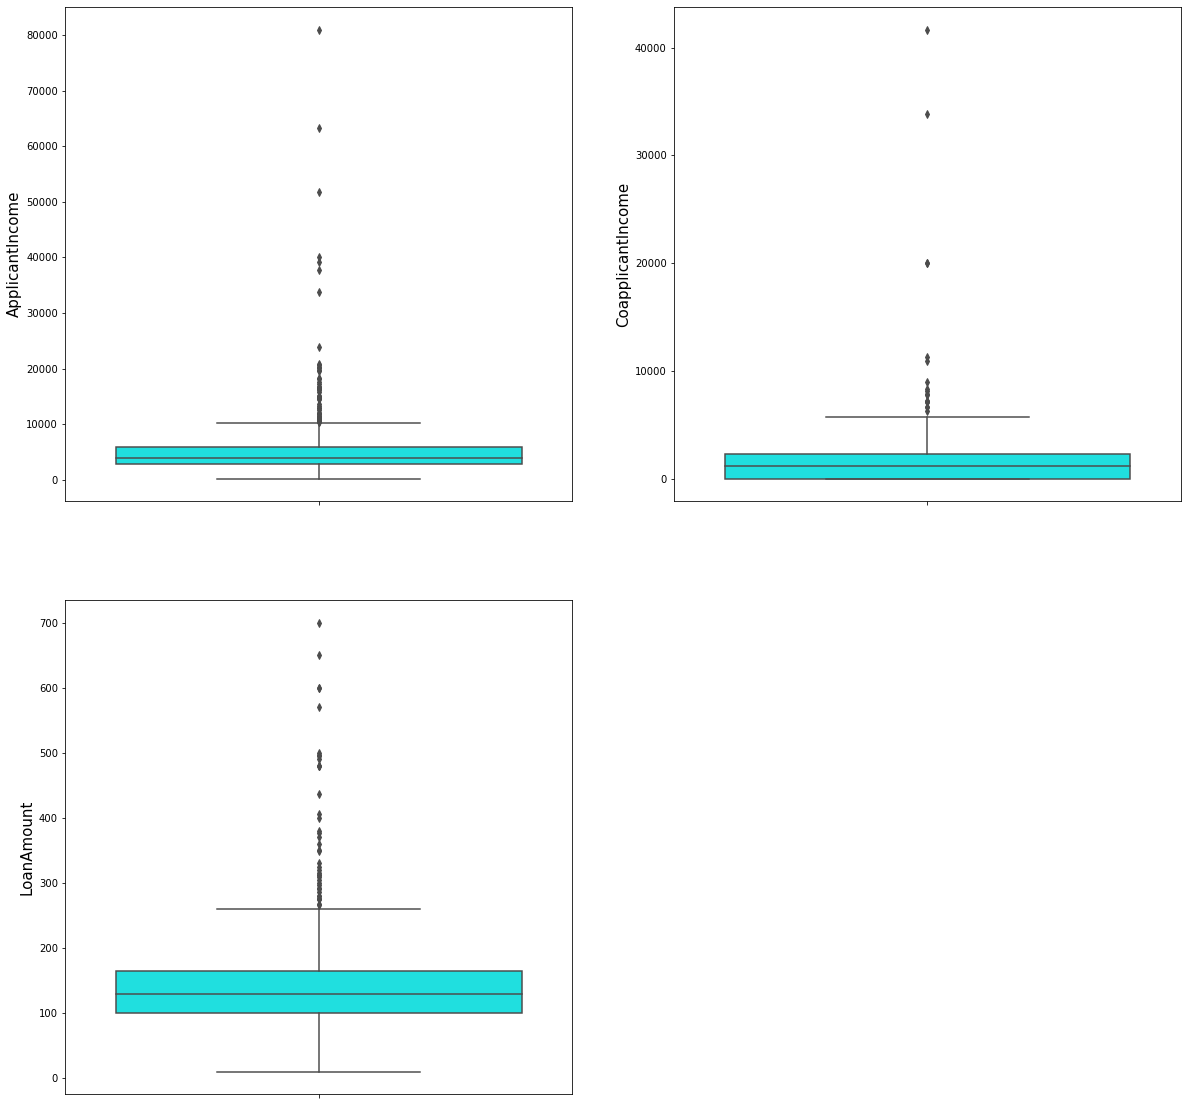

In [55]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(y=df[column],color='cyan')
        plt.ylabel(column,fontsize=15)
        
    graph+=1
plt.show()

1] Outlers are observe in all continuous features all outliers are observedat hogh side which suggest right skewed nature of graph

* Analyse outliers removal and data loss 

In [56]:
data=df.copy()
rows_before1=data.shape[0]
rows_before1

614

In [57]:
from scipy.stats import zscore

z1=np.abs(zscore(data[cont]))
data=data[(z1<3).all(axis=1)]


In [58]:
rows_after1=data.shape[0]
rows_after1

589

In [59]:

loss1=((rows_before1-rows_after1)/rows_before1)*100
loss1


4.071661237785016

* Data Loss after removal of outliers is 4.071% so it can be safe to remove outliers with 
  z score method

* Analysis of Distribution of continuous feature before and after outliers removal

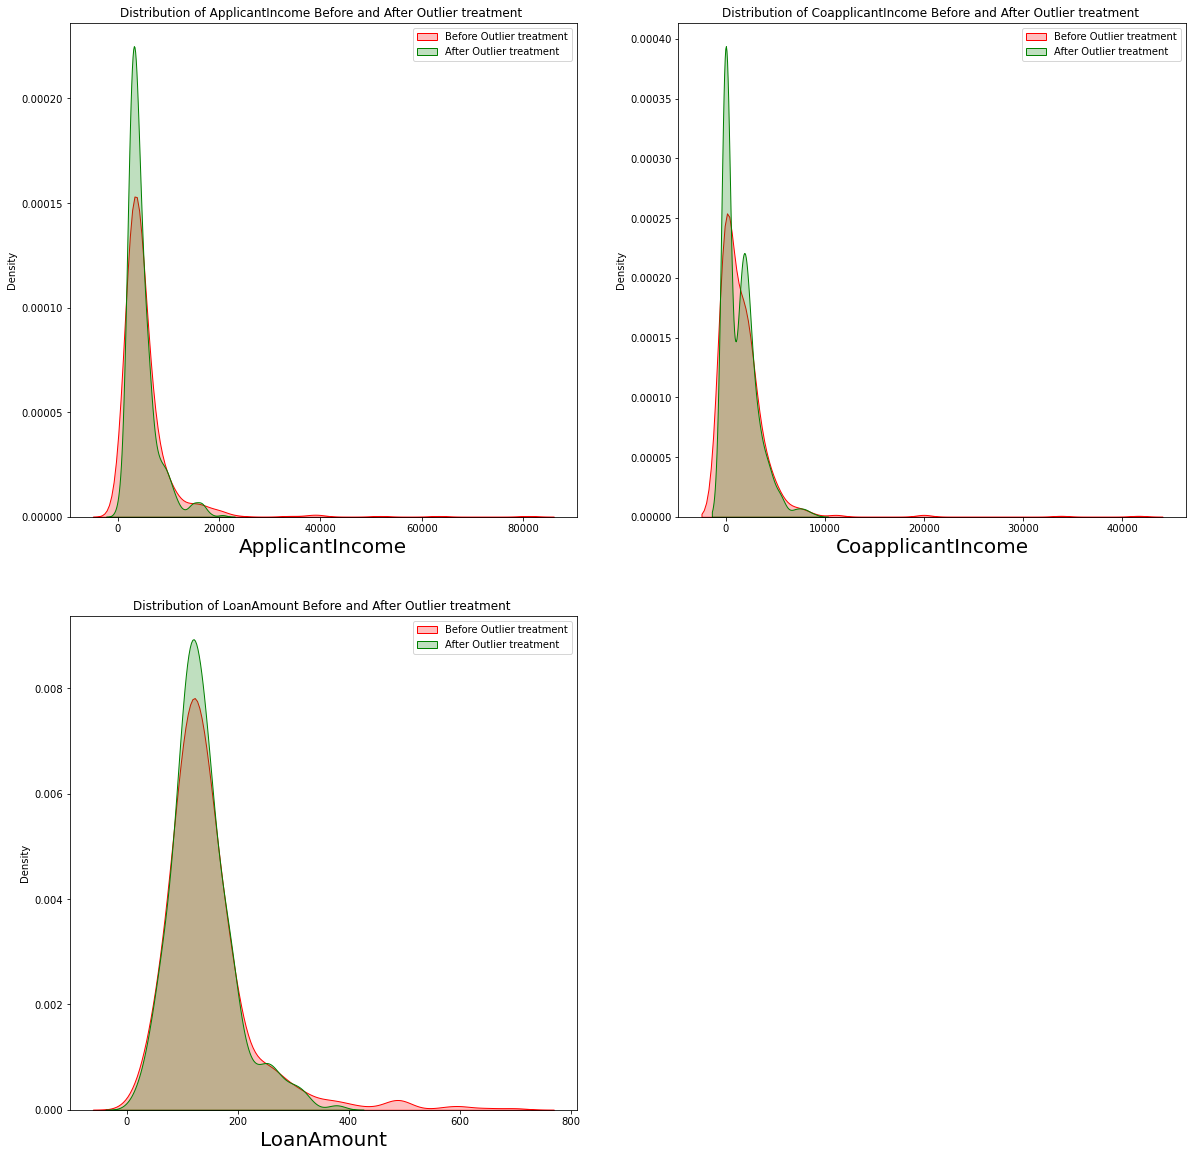

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(2,2,graph)
        sns.kdeplot(df[column],color='red',shade=True)
        sns.kdeplot(data[column],color='green',shade=True)
        plt.xlabel(column,fontsize=20)
        plt.title("Distribution of {} Before and After Outlier treatment ".format(column))
        plt.legend(['Before Outlier treatment','After Outlier treatment'])
    graph+=1
plt.show()
plt.tight_layout()

* Lets remove outliers with zscore

In [61]:
# shape of dataset before outliers removal
df.shape

(614, 12)

In [62]:
z=np.abs(zscore(df[cont]))
df=df[(z<3).all(axis=1)]


In [63]:
df.shape

(589, 12)

In [64]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


* Encoding Object datatype features with numeric data.

In [65]:
obj

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
for i in obj:
    df[i]=le.fit_transform(df[i])
    

In [68]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [69]:
df.shape

(589, 12)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             589 non-null    int32  
 1   Married            589 non-null    int32  
 2   Dependents         589 non-null    int32  
 3   Education          589 non-null    int32  
 4   Self_Employed      589 non-null    int32  
 5   ApplicantIncome    589 non-null    int64  
 6   CoapplicantIncome  589 non-null    float64
 7   LoanAmount         589 non-null    float64
 8   Loan_Amount_Term   589 non-null    float64
 9   Credit_History     589 non-null    float64
 10  Property_Area      589 non-null    int32  
 11  Loan_Status        589 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 43.7 KB


* Correlation Analysis of variables

In [71]:
cor=df.corr().abs()

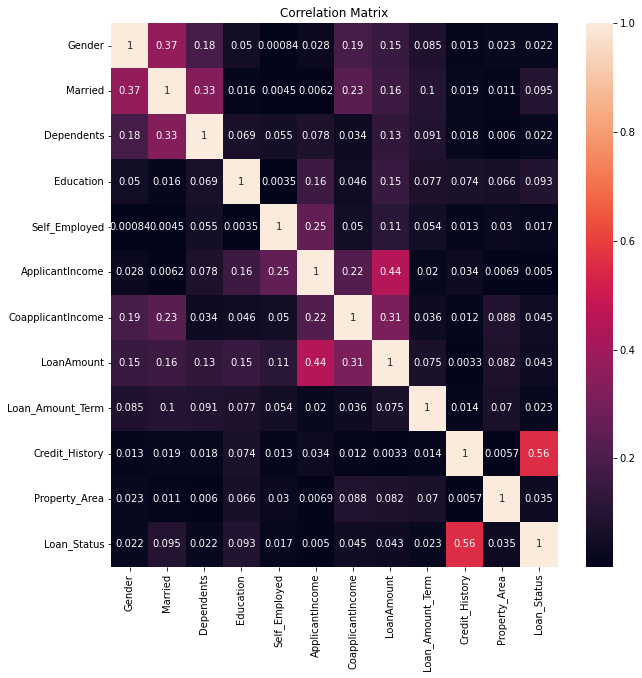

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

1] LoanAmount 44% dependent on ApplicantsIncome as More Income of Person higher the probability of getting loan.

2] Loan_Status have 0.56 correlation with Credit_History

3] Marrital Status is depended on Gender as Female get married early as compare to man. correlation of 0.37

4] Dependents have correlation of 0.33 with Marital  status. as married people have family which will increase dependents number

5] coapplicants have 0.31 correlation with LoanAmount.

* Correlation with LOan Status label

In [73]:
cor_label=(df.drop('Loan_Status',axis=1)).corrwith(df['Loan_Status']).abs()
cor_label

Gender               0.021942
Married              0.095124
Dependents           0.021937
Education            0.092852
Self_Employed        0.016617
ApplicantIncome      0.005043
CoapplicantIncome    0.044815
LoanAmount           0.042738
Loan_Amount_Term     0.023119
Credit_History       0.555908
Property_Area        0.034894
dtype: float64

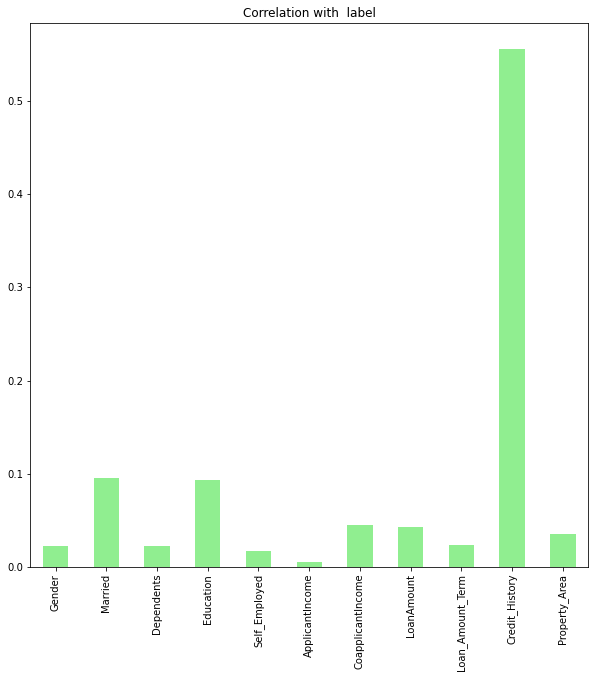

In [74]:
plt.figure(figsize=(10,10))
cor_label.plot(kind="bar",color='lightgreen')
plt.title("Correlation with  label")
plt.show()

1] credit History is only feature in dataset having more than 0.5 correlation with label

2] Married and Education feature have low ccorrelation upto 0.1 with label.

3] all remaing features have very low correlation with label.

* Analyse Multicollinearity with Variance Inflation Factor,Threshold for vif score is defined as 5 as data is less 


In [75]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['Loan_Status'],axis=1)
predictor1=Predictors1.to_numpy()

In [76]:
VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1

,Features,vif_scores
0,Gender,6.138249
1,Married,3.788298
2,Dependents,1.804562
3,Education,1.319311
4,Self_Employed,1.231194
5,ApplicantIncome,5.512392
6,CoapplicantIncome,2.489340
7,LoanAmount,11.234341
8,Loan_Amount_Term,11.518887
9,Credit_History,6.057136


* Analyse vif score after eliminating Loan_Amount_Term

In [77]:
Predictors2=df.drop(columns=['Loan_Status','Loan_Amount_Term'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2

,Features,vif_scores
0,Gender,5.813983
1,Married,3.786863
2,Dependents,1.800472
3,Education,1.282907
4,Self_Employed,1.230673
5,ApplicantIncome,5.489839
6,CoapplicantIncome,2.488938
7,LoanAmount,9.816232
8,Credit_History,4.809216
9,Property_Area,2.412789


* Analyse vif score after removal of LoanAmount

In [78]:
Predictors3=df.drop(columns=['Loan_Status','Loan_Amount_Term','LoanAmount'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3

,Features,vif_scores
0,Gender,5.650563
1,Married,3.774972
2,Dependents,1.775845
3,Education,1.282583
4,Self_Employed,1.230673
5,ApplicantIncome,3.402745
6,CoapplicantIncome,1.903949
7,Credit_History,4.577295
8,Property_Area,2.399050


*  Analyse vif score after removal of Gender

In [79]:
Predictors4=df.drop(columns=['Loan_Status','Loan_Amount_Term','LoanAmount','Gender'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4

,Features,vif_scores
0,Married,3.300689
1,Dependents,1.760194
2,Education,1.247875
3,Self_Employed,1.230581
4,ApplicantIncome,3.194154
5,CoapplicantIncome,1.789740
6,Credit_History,4.199679
7,Property_Area,2.355043


* It is requireed to remove Gender LoanAmount and Loan AmountTerm from dataset.

* Analysis for Skewness in  continuous features features.


In [80]:
df[cont].skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
dtype: float64

<AxesSubplot:>

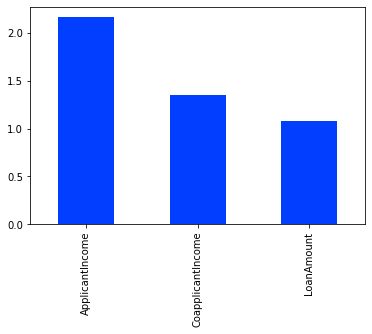

In [81]:
df[cont].skew().plot.bar()

* Analysis with various transformation to remove skewness in dataset.

In [82]:
data=df.copy()

1] Power Transformation with yeo-johnson method .

In [83]:
from sklearn.preprocessing import PowerTransformer

In [84]:
transform1=pd.DataFrame()
pwr1=PowerTransformer(method='yeo-johnson')
transform1[cont]=pwr1.fit_transform(data[cont])
transform1[cont].skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
dtype: float64

* Sqaure root transformation

In [85]:
transform2=pd.DataFrame()
transform2=np.sqrt(data[cont])
transform2.skew()


ApplicantIncome      1.214219
CoapplicantIncome    0.217598
LoanAmount           0.230632
dtype: float64

* Cuberoot transformation

In [86]:
transform3=pd.DataFrame()
transform3=np.cbrt(data[cont])
transform3.skew()

ApplicantIncome      0.848471
CoapplicantIncome   -0.030379
LoanAmount          -0.098485
dtype: float64

* log transformation

In [87]:
transform4=pd.DataFrame()
transform4=np.log(data[cont])
transform4.skew()

ApplicantIncome     -0.207659
CoapplicantIncome         NaN
LoanAmount          -0.914952
dtype: float64

* Quantile Transformation

In [88]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(n_quantiles=100,output_distribution='normal')

transform5=pd.DataFrame()
transform5[cont]=qt.fit_transform(data[cont])
transform5[cont].skew()


ApplicantIncome     -0.025465
CoapplicantIncome   -0.156928
LoanAmount           0.023491
dtype: float64

* Out of all above transformation QuantileTransformer works betterr.

Lets transform original dataframe with QuantileTransformer

In [89]:
qt=QuantileTransformer(n_quantiles=100,output_distribution='normal')
df[cont]=qt.fit_transform(df[cont])

* Analyse skewness after transformation.

In [90]:
df[cont].skew()

ApplicantIncome     -0.025465
CoapplicantIncome   -0.156928
LoanAmount           0.023491
dtype: float64

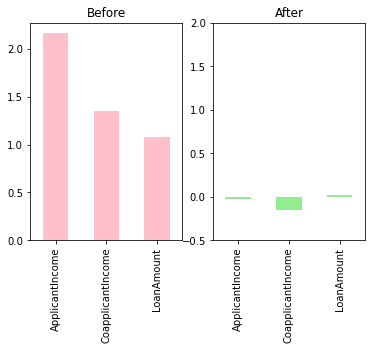

In [91]:
fig,axs=plt.subplots(1,2)
data[cont].skew().plot.bar(ax=axs[0],color='pink',title='Before')
df[cont].skew().plot.bar(ax=axs[1],color='lightgreen',title='After')
plt.yticks(np.arange(-0.5,2.5,0.5))
plt.show()

* Skewness has been removed from features can be observed from graph

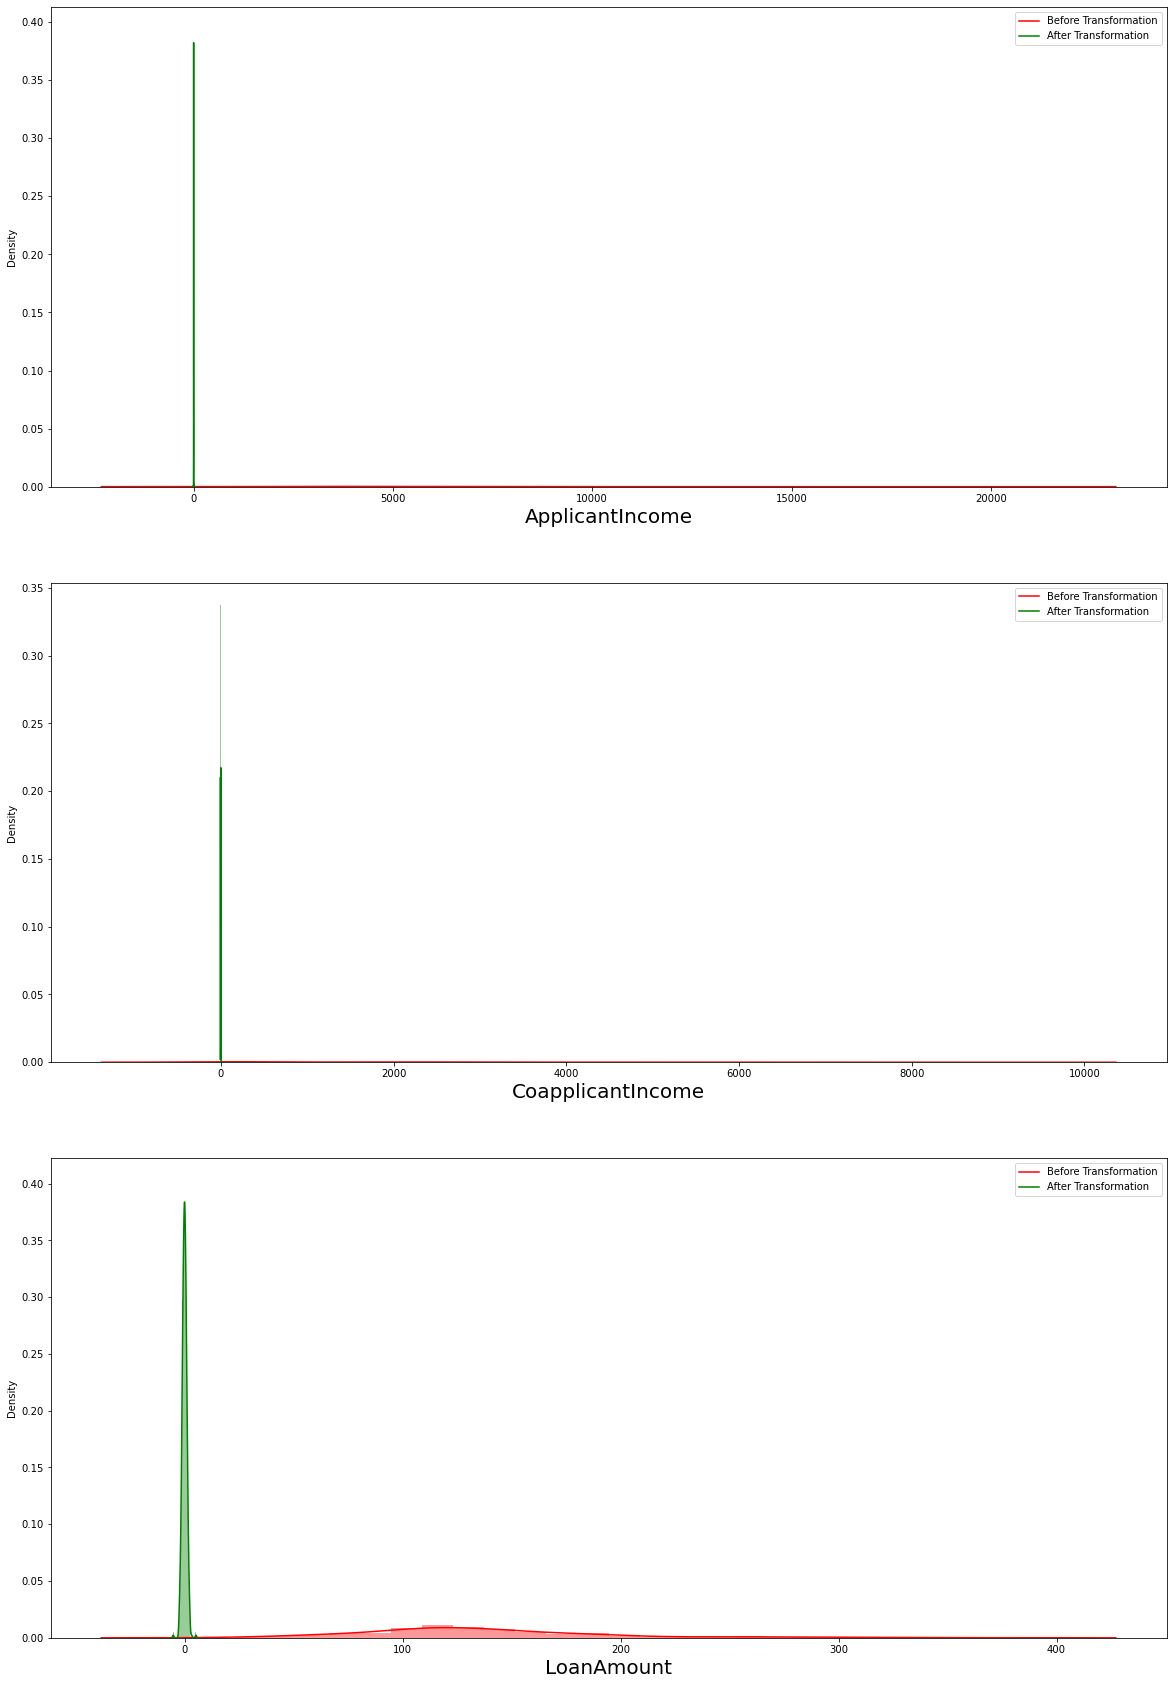

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(3,1,graph)
        sns.distplot(data[column],color='red')
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
        plt.legend(['Before Transformation','After Transformation'])
        
    graph+=1
plt.show()
plt.tight_layout()

* Skewnes shas been remove completely from feature as observed in distribution grapgh and skwness values 

* Analysing Imbalanced In Label

In [93]:
df['Loan_Status'].value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

<AxesSubplot:ylabel='Loan_Status'>

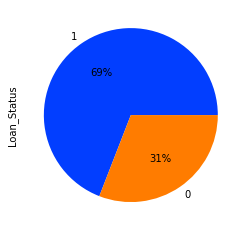

In [94]:
df['Loan_Status'].value_counts().plot.pie(autopct="%0.00f%%")

<AxesSubplot:>

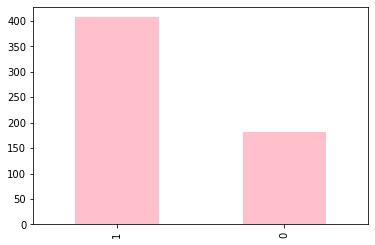

In [95]:
df['Loan_Status'].value_counts().plot.bar(color='pink')

* There is imbalanced in Label feature as 70 -30 proportion of binary class

* Splitting dataset into feature and label

In [96]:
x1=df.drop('Loan_Status',axis=1)
y1=df.Loan_Status

In [97]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)

x1 shape is  (589, 11)
y1 shape is  (589,)


* Standadization of features.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [99]:
x_scaled.shape

(589, 11)

* As feature have less correlation with label hence to handle this scenario of low correlation to extract highly correlated data  from features PCA can be effective solution.

In [100]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 1.06340217,  1.25352172, -0.11093948, ..., -0.41580924,
         0.65474655,  0.29256604],
       [-1.07491596, -0.09522081, -0.92363455, ..., -0.47872736,
        -0.23185581, -0.48876325],
       [ 0.62652721,  0.36735746,  1.22126077, ..., -1.69961854,
        -0.85638481,  0.33306137],
       ...,
       [-1.5938757 ,  0.95737528, -0.59354743, ...,  0.7282927 ,
        -0.09754986, -0.17525401],
       [-1.16548849,  1.51199197,  0.58503137, ...,  0.21294668,
        -0.08781924,  0.4657314 ],
       [ 2.1815251 ,  2.11735779,  0.27103826, ...,  0.23377222,
        -0.17714721,  0.19581429]])

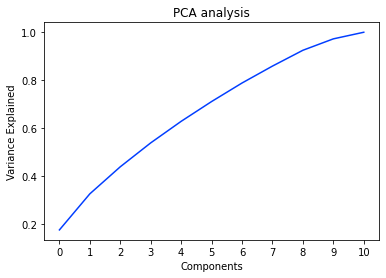

In [101]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,11))
plt.show()

In [102]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.174895
1     0.325577
2     0.438469
3     0.538250
4     0.628187
5     0.710776
6     0.788143
7     0.858738
8     0.924793
9     0.972376
10    1.000000
dtype: float64

* 10 components of PCA explains 97.23 % variance which willbe used for model building

In [103]:
pca1=PCA(n_components=10)
dim1=pca1.fit_transform(x_scaled)
x_dim1=pd.DataFrame(dim1,columns=[('PC{}').format(i) for i in range(1,11)])
x_dim1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.063402,1.253522,-0.110939,-1.145395,0.362432,-0.142165,0.355357,-1.337150,-0.415809,0.654747
1,-1.074916,-0.095221,-0.923635,0.119152,-0.686663,-0.493324,0.328502,0.684168,-0.478727,-0.231856
2,0.626527,0.367357,1.221261,-0.780024,-0.111381,1.470855,-2.263171,0.009138,-1.699619,-0.856385
3,-0.328251,-1.899587,0.269866,-0.120519,-0.064763,0.238390,-0.577602,-1.817304,0.540295,-0.568728
4,1.097891,1.253588,-0.070530,-1.154152,0.351865,-0.159953,0.354097,-1.326373,-0.460719,0.631062
...,...,...,...,...,...,...,...,...,...,...
584,2.954443,0.119202,-0.558203,0.377803,-0.928917,-0.511615,0.236957,1.386503,0.099045,-0.221154
585,-0.664257,-0.170002,2.777805,-0.330101,-1.381170,-1.147243,1.203657,2.443543,-1.028394,0.224979
586,-1.593876,0.957375,-0.593547,-1.288531,0.674224,-0.112129,0.054563,-0.896010,0.728293,-0.097550
587,-1.165488,1.511992,0.585031,-1.294988,0.696673,-1.264453,-0.225048,-0.446199,0.212947,-0.087819


* Datset with component

In [104]:
x_dim1.shape

(589, 10)

In [105]:
y1.shape

(589,)

* Imbalanced in classes in label 

In [106]:
y1.value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

<AxesSubplot:>

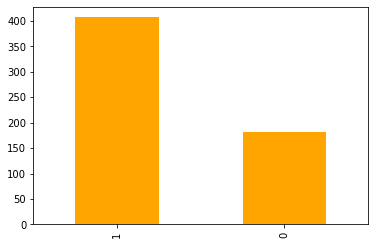

In [107]:
y1.value_counts().plot.bar(color='orange')

* Oversampling algorithms to convert imbalanced classes into balanced classes.

In [108]:
from imblearn.over_sampling import ADASYN

ad=ADASYN(0.85,n_neighbors=3,random_state=313)

In [109]:
x,y=ad.fit_resample(x_dim1,y1)

In [110]:
print('Resample features shape is ',x.shape)
print('Resample label shape is ',y.shape)

Resample features shape is  (767, 10)
Resample label shape is  (767,)


* Class wise Distribution of Label after oversampling.   

In [111]:
y.value_counts()

1    407
0    360
Name: Loan_Status, dtype: int64

<AxesSubplot:>

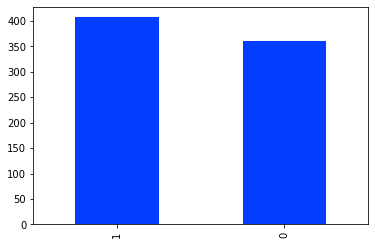

In [112]:
y.value_counts().plot.bar()

<AxesSubplot:ylabel='Loan_Status'>

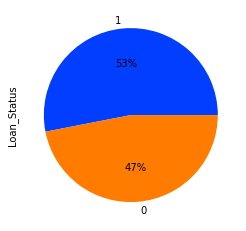

In [113]:
y.value_counts().plot.pie(autopct="%0.00f%%")

* Training algorithms 

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve

In [115]:
from sklearn.model_selection import train_test_split


maxac=0
maxRs=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("acuracy score ",acc,'Random sate ',i)
    
    if acc>maxac:
        maxac=acc
        maxRs=i
        print("Accuracy",maxac,"random_state",i)
        
        

acuracy score  0.6103896103896104 Random sate  1
Accuracy 0.6103896103896104 random_state 1
acuracy score  0.6493506493506493 Random sate  2
Accuracy 0.6493506493506493 random_state 2
acuracy score  0.6493506493506493 Random sate  3
acuracy score  0.6493506493506493 Random sate  4
acuracy score  0.6363636363636364 Random sate  5
acuracy score  0.6363636363636364 Random sate  6
acuracy score  0.6688311688311688 Random sate  7
Accuracy 0.6688311688311688 random_state 7
acuracy score  0.6103896103896104 Random sate  8
acuracy score  0.6298701298701299 Random sate  9
acuracy score  0.6038961038961039 Random sate  10
acuracy score  0.6753246753246753 Random sate  11
Accuracy 0.6753246753246753 random_state 11
acuracy score  0.6168831168831169 Random sate  12
acuracy score  0.6363636363636364 Random sate  13
acuracy score  0.6038961038961039 Random sate  14
acuracy score  0.6883116883116883 Random sate  15
Accuracy 0.6883116883116883 random_state 15
acuracy score  0.6753246753246753 Random s

In [116]:
print("Maximum accuracy Score is {0} and Random state is {1}".format(maxac,maxRs))

Maximum accuracy Score is 0.7532467532467533 and Random state is 95


* train Test Split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=95)

* Score fuction for binary classification

In [118]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Precision Score is ", precision_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test f1 Score is ", f1_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Recall Score is ", recall_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        print('-'*50)
        print('\n Confusion Matrix  \n\n',confusion_matrix(y_tst,ypred_test))

* Logistic Regression

In [119]:
Lr1=LogisticRegression()
Lr1.fit(x_train,y_train)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.632952691680261
******************************************************
Train roc_auc_Score is  0.6130238880089045
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7532467532467533
******************************************************
Test Precision Score is  0.6818181818181818
******************************************************
Test f1 Score is  0.7978723404255318
******************************************************
Test Recall Score is  0.9615384615384616
******************************************************
Test roc_auc_Score is  0.750506072874494
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.932     0.539     0.683        76
           1      0.682     0.962     0.798        78

    accuracy                          0.753       154
   macro a

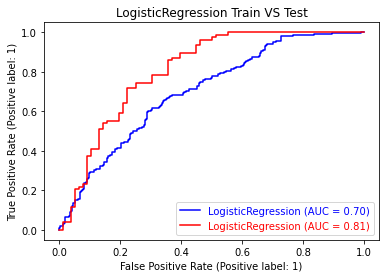

In [120]:
AucPlot1=plot_roc_curve(Lr1,x_train,y_train,color='b')
plot_roc_curve(Lr1,x_test,y_test,ax=AucPlot1.ax_,color='r')
plt.title("LogisticRegression Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Decision Tree Classifier

In [121]:
dt1=DecisionTreeClassifier(criterion='gini',min_samples_split=18,min_samples_leaf=30,max_depth=25,random_state=112)
dt1.fit(x_train,y_train)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.7275693311582382
******************************************************
Train roc_auc_Score is  0.7199526948927608
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7272727272727273
******************************************************
Test Precision Score is  0.7142857142857143
******************************************************
Test f1 Score is  0.7407407407407408
******************************************************
Test Recall Score is  0.7692307692307693
******************************************************
Test roc_auc_Score is  0.7267206477732794
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.743     0.684     0.712        76
           1      0.714     0.769     0.741        78

    accuracy                          0.727       154
   macro

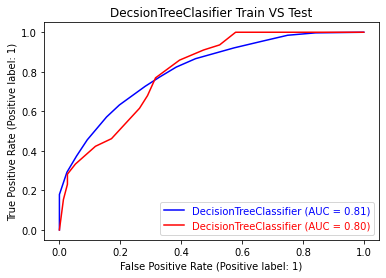

In [122]:
AucPlot2=plot_roc_curve(dt1,x_train,y_train,color='b')
plot_roc_curve(dt1,x_test,y_test,ax=AucPlot2.ax_,color='r')
plt.title("DecsionTreeClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* KNeighborsClassifier

In [123]:
knn1=KNeighborsClassifier(n_neighbors=3,leaf_size=30,algorithm='auto',weights='distance',metric='minkowski')
knn1.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8376623376623377
******************************************************
Test Precision Score is  0.8840579710144928
******************************************************
Test f1 Score is  0.8299319727891156
******************************************************
Test Recall Score is  0.782051282051282
******************************************************
Test roc_auc_Score is  0.8383940620782726
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.800     0.895     0.845        76
           1      0.884     0.782     0.830        78

    accuracy                          0.838       154
   macro avg      0.842     0.838     0

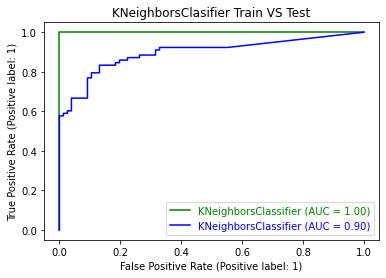

In [124]:
AucPlot3=plot_roc_curve(knn1,x_train,y_train,color='green')
plot_roc_curve(knn1,x_test,y_test,ax=AucPlot3.ax_,color='blue')
plt.title("KNeighborsClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* GradientBoostingClassifier

In [125]:
gbdt1=GradientBoostingClassifier(learning_rate=0.151,n_estimators=100,criterion='friedman_mse',min_samples_split=10,min_samples_leaf=11,max_depth=18,random_state=112)
gbdt1.fit(x_train,y_train)

Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8506493506493507
******************************************************
Test Precision Score is  0.8481012658227848
******************************************************
Test f1 Score is  0.8535031847133757
******************************************************
Test Recall Score is  0.8589743589743589
******************************************************
Test roc_auc_Score is  0.8505398110661267
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.853     0.842     0.848        76
           1      0.848     0.859     0.854        78

    accuracy                          0.851       154
   macro avg      0.851     0.851     

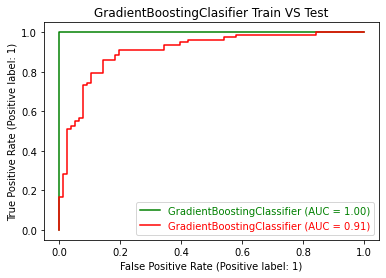

In [126]:
AucPlot4=plot_roc_curve(gbdt1,x_train,y_train,color='green')
plot_roc_curve(gbdt1,x_test,y_test,ax=AucPlot4.ax_,color='red')
plt.title("GradientBoostingClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* RandomForestClassifier

In [127]:
rf1=RandomForestClassifier(criterion='gini',max_depth=18,min_samples_split=13,min_samples_leaf=1,bootstrap=True,oob_score=True,random_state=118)
rf1.fit(x_train,y_train)

Cscore(rf1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf1,x_train,y_train,x_test,y_test,train_score=False)



******** Train Results***************
Train Accuracy Score is  0.967373572593801
******************************************************
Train roc_auc_Score is  0.9669559912667495
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8636363636363636
******************************************************
Test Precision Score is  0.8701298701298701
******************************************************
Test f1 Score is  0.8645161290322582
******************************************************
Test Recall Score is  0.8589743589743589
******************************************************
Test roc_auc_Score is  0.863697705802969
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.857     0.868     0.863        76
           1      0.870     0.859     0.865        78

    accuracy                          0.864       154
   macro a

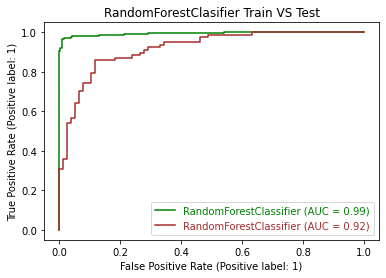

In [128]:
AucPlot5=plot_roc_curve(rf1,x_train,y_train,color='green')
plot_roc_curve(rf1,x_test,y_test,ax=AucPlot5.ax_,color='brown')
plt.title("RandomForestClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* XGBClassifier

In [129]:
xgc1=XGBClassifier(learning_rate=0.1,booster='gbtree',max_depth=18,random_state=118)
xgc1.fit(x_train,y_train)

Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8506493506493507
******************************************************
Test Precision Score is  0.8395061728395061
******************************************************
Test f1 Score is  0.8553459119496856
******************************************************
Test Recall Score is  0.8717948717948718
******************************************************
Test roc_auc_Score is  0.8503711201079622
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.863     0.829     0.846        76
           1      0.840     0.872     0.855        78

    accuracy                          0.851       154
   macro avg      0.851     0.850     

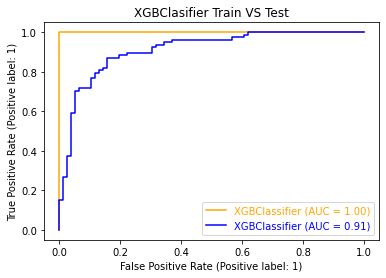

In [130]:
AucPlot6=plot_roc_curve(xgc1,x_train,y_train,color='orange')
plot_roc_curve(xgc1,x_test,y_test,ax=AucPlot6.ax_,color='b')
plt.title("XGBClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* AdabosstClassifier

In [131]:
ada1=AdaBoostClassifier(n_estimators=100,learning_rate=0.157,random_state =118)
ada1.fit(x_train,y_train)

Cscore(ada1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(ada1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.7357259380097879
******************************************************
Train roc_auc_Score is  0.7205680893873881
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7597402597402597
******************************************************
Test Precision Score is  0.6915887850467289
******************************************************
Test f1 Score is  0.7999999999999999
******************************************************
Test Recall Score is  0.9487179487179487
******************************************************
Test roc_auc_Score is  0.7572537112010795
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.915     0.566     0.699        76
           1      0.692     0.949     0.800        78

    accuracy                          0.760       154
   macro

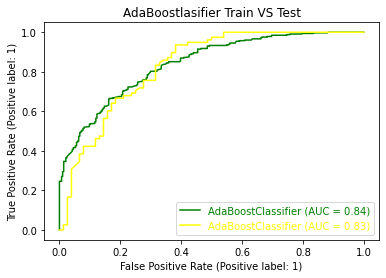

In [132]:
AucPlot7=plot_roc_curve(ada1,x_train,y_train,color='green')
plot_roc_curve(ada1,x_test,y_test,ax=AucPlot7.ax_,color='yellow')
plt.title("AdaBoostlasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Finding best cv param for performing and obtaining most generalized cross validation score

In [133]:
from sklearn.model_selection import cross_val_score


for i in [3,5,7,8,9,10]:
    cv=cross_val_score(LogisticRegression(),x,y,cv=i,scoring='accuracy')
    print("Accuracy score is {0} for cv={1}".format(cv.mean(),i))

Accuracy score is 0.6374897875816994 for cv=3
Accuracy score is 0.6387148798913505 for cv=5
Accuracy score is 0.6477779101632313 for cv=7
Accuracy score is 0.6401315789473684 for cv=8
Accuracy score is 0.6504787961696307 for cv=9
Accuracy score is 0.6464114832535885 for cv=10


* Table for analysis of scores

In [134]:
classifiers =[Lr1,knn1,gbdt1,dt1,rf1,xgc1,ada1]
name=['LogisticRegression','KNeighborsClassifier','GradientBoostClassifier',
      'DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','AdaBoostClassifier']

In [135]:
test_score=[]
ra_score=[]
train_score=[]
for i in classifiers:
    ypred_test=i.predict(x_test)
    ypred_train=i.predict(x_train)
    test_score.append(accuracy_score(y_test,ypred_test))
    ra_score.append(roc_auc_score(y_test,ypred_test))
    train_score.append(accuracy_score(y_train,ypred_train))

* Cross Validation 

In [136]:
cv_scores_mean=[]
cv_scores=[]
for clf in classifiers:
    scr=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.6387148798913505,
 0.7783634665987608,
 0.7849163907987438,
 0.6452678040913334,
 0.7339529751294458,
 0.7809438927085985,
 0.6295985060690942]

In [137]:
Eval_clf=pd.DataFrame({'Classifier':name,'Train Accuracy Score':train_score,'Test Accuracy Score':test_score,
                      'ROC_AUC_Score':ra_score,'Validation Score':cv_scores_mean})


In [138]:
Eval_clf["criteria of selecting best model"]=Eval_clf['Test Accuracy Score']-Eval_clf['Validation Score']
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
0,LogisticRegression,0.632953,0.753247,0.750506,0.638715,0.114532
1,KNeighborsClassifier,1.000000,0.837662,0.838394,0.778363,0.059299
2,GradientBoostClassifier,1.000000,0.850649,0.850540,0.784916,0.065733
3,DecisionTreeClassifier,0.727569,0.727273,0.726721,0.645268,0.082005
4,RandomForestClassifier,0.967374,0.863636,0.863698,0.733953,0.129683
5,XGBoostClassifier,1.000000,0.850649,0.850371,0.780944,0.069705
6,AdaBoostClassifier,0.735726,0.759740,0.757254,0.629599,0.130142


In [139]:
Eval_clf.sort_values(by="criteria of selecting best model",ascending=True)


,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
1,KNeighborsClassifier,1.000000,0.837662,0.838394,0.778363,0.059299
2,GradientBoostClassifier,1.000000,0.850649,0.850540,0.784916,0.065733
5,XGBoostClassifier,1.000000,0.850649,0.850371,0.780944,0.069705
3,DecisionTreeClassifier,0.727569,0.727273,0.726721,0.645268,0.082005
0,LogisticRegression,0.632953,0.753247,0.750506,0.638715,0.114532
4,RandomForestClassifier,0.967374,0.863636,0.863698,0.733953,0.129683
6,AdaBoostClassifier,0.735726,0.759740,0.757254,0.629599,0.130142


* The best performance is obtained with KneighborsClassifier with least deviation in Test score and validation score.

* AUC plot for Train Data

In [140]:
def TrainAUCplot(clf_list,x_train,y_train):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_train,y_train)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_train,y_train,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Train data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

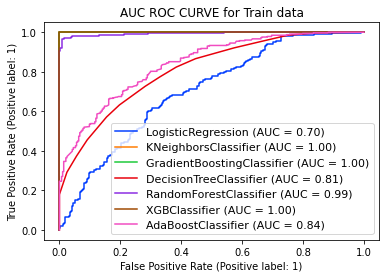

In [141]:
TrainAUCplot(classifiers,x_train,y_train)

* KNeighborsclassifier has 1.0 auc which very least deviated from other classifeirs

* AUC for Test Data

In [142]:
def TestAUCplot(clf_list,x_test,y_test):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_test,y_test)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_test,y_test,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Test data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

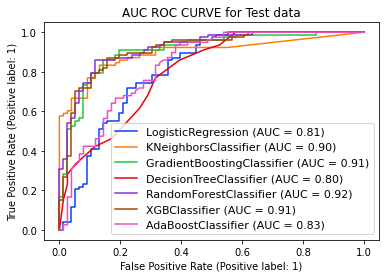

In [143]:
TestAUCplot(classifiers,x_test,y_test)

* KNeighborsClassifier has best performance in validation score and also in AUC of test and train data.hence we will perform hyperparameter tunning on KNeighborsClassifier

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param2={'n_neighbors':[3,5,7,9],'metric':["minkowski",'cosine'],'leaf_size':[15,20,25,30,35],
        'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

grid2=GridSearchCV(KNeighborsClassifier(),param_grid=param2,cv=5).fit(x_train,y_train) 
print(grid2.best_params_)
     


{'algorithm': 'auto', 'leaf_size': 15, 'metric': 'cosine', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [146]:
knn2=grid2.best_estimator_
knn2.fit(x_train,y_train)

Cscore(knn2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn2,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8311688311688312
******************************************************
Test Precision Score is  0.8611111111111112
******************************************************
Test f1 Score is  0.8266666666666667
******************************************************
Test Recall Score is  0.7948717948717948
******************************************************
Test roc_auc_Score is  0.8316464237516868
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.805     0.868     0.835        76
           1      0.861     0.795     0.827        78

    accuracy                          0.831       154
   macro avg      0.833     0.832     

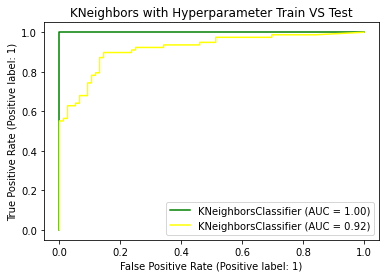

In [147]:
AucPlot8=plot_roc_curve(knn2,x_train,y_train,color='green')
plot_roc_curve(knn2,x_test,y_test,ax=AucPlot8.ax_,color='yellow')
plt.title("KNeighbors with Hyperparameter Train VS Test")
plt.show()

* The Best Model achieved is knn1 which is Kneighbors Classifier with parameters n_neighbors=3,leaf_size=30,algorithm='auto',weights='distance',metric='minkowski' having scores as foloows score as folows

1] Test accuracy score 0.8376

2] roc_auc_score 0.8383

3] Auc is 0.91 

In [148]:
knn1=KNeighborsClassifier(n_neighbors=3,leaf_size=30,algorithm='auto',weights='distance',metric='minkowski')
knn1.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8376623376623377
******************************************************
Test Precision Score is  0.8840579710144928
******************************************************
Test f1 Score is  0.8299319727891156
******************************************************
Test Recall Score is  0.782051282051282
******************************************************
Test roc_auc_Score is  0.8383940620782726
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.800     0.895     0.845        76
           1      0.884     0.782     0.830        78

    accuracy                          0.838       154
   macro avg      0.842     0.838     0

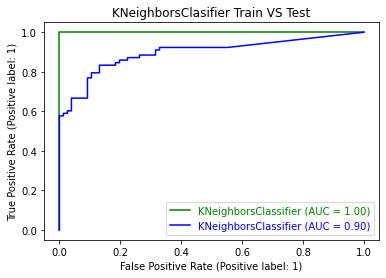

In [149]:
AucPlot3=plot_roc_curve(knn1,x_train,y_train,color='green')
plot_roc_curve(knn1,x_test,y_test,ax=AucPlot3.ax_,color='blue')
plt.title("KNeighborsClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Save Model

In [150]:
import joblib
joblib.dump(knn1,"LoApplKnn.pkl")

['LoApplKnn.pkl']